# 0. Install and Import dependencies

In [5]:
%pip install stable-baselines3 gym yfinance
%pip install finta

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ------------------------------- ------ 786.4/948.2 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.8 MB 2.4 MB/s eta 0:00:02
   ------------- -------------------------- 1.3/3.8 MB 2.1 MB/s eta 0:00:02
   ------------------- -------------------- 1.8/3.8 MB 2.4 MB/s eta 0:00

In [4]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import gym


# 1. Getting Data and preprocessing it from Yahoo Finance

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

btc_data = yf.download('BTC-USD', start='2024-01-01', end='2025-01-15') # 1 year of data
btc_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [13]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data = btc_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [14]:
btc_data = btc_data.set_index('Date')

In [15]:
btc_data.columns = [col[0] for col in btc_data.columns]  # Use the first level of the MultiIndex


In [16]:
btc_data

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347
...,...,...,...,...,...
2025-01-10,92494.492188,95770.609375,92250.093750,94701.453125,62058693684
2025-01-11,94700.835938,94977.687500,93840.046875,94566.593750,18860894100
2025-01-12,94565.726562,95367.539062,93712.507812,94488.437500,20885130965


In [12]:
btc_data.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [13]:
btc_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347


In [17]:
btc_data.head().sort_values('Date', ascending=True, inplace=True)
btc_data

C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1774228515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data.head().sort_values('Date', ascending=True, inplace=True)


,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347
...,...,...,...,...,...
2025-01-10,92494.492188,95770.609375,92250.093750,94701.453125,62058693684
2025-01-11,94700.835938,94977.687500,93840.046875,94566.593750,18860894100
2025-01-12,94565.726562,95367.539062,93712.507812,94488.437500,20885130965


# 2. Build Environment

In [7]:
from time import time
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym


class Actions(Enum):
    Sell = 0
    Buy = 1


class Positions(Enum):
    Short = 0
    Long = 1

    def opposite(self):
        return Positions.Short if self == Positions.Long else Positions.Long


class TradingEnv(gym.Env):

    metadata = {'render_modes': ['human'], 'render_fps': 3}

    def __init__(self, df, window_size, render_mode=None):
        assert df.ndim == 2
        assert render_mode is None or render_mode in self.metadata['render_modes']

        self.render_mode = render_mode

        self.df = df
        self.window_size = window_size
        self.prices, self.signal_features = self._process_data()
        self.shape = (window_size, self.signal_features.shape[1])

        # spaces
        self.action_space = gym.spaces.Discrete(len(Actions))
        INF = 1e10
        self.observation_space = gym.spaces.Box(
            low=-INF, high=INF, shape=self.shape, dtype=np.float32,
        )

        # episode
        self._start_tick = self.window_size
        self._end_tick = len(self.prices) - 1
        self._truncated = None
        self._current_tick = None
        self._last_trade_tick = None
        self._position = None
        self._position_history = None
        self._total_reward = None
        self._total_profit = None
        self._first_rendering = None
        self.history = None
        self.initBalance = 10000

    def reset(self, seed=None, options=None):
        super().reset(seed=seed, options=options)
        if seed is None:
            seed = int(time())  # Use current time as a seed
        self.action_space.seed(int((self.np_random.uniform(0, seed if seed is not None else 1))))

        self._truncated = False
        self._current_tick = self._start_tick
        self._last_trade_tick = self._current_tick - 1
        self._position = Positions.Short
        self._position_history = (self.window_size * [None]) + [self._position]
        self._total_reward = 0.
        self._total_profit = 1.  # unit
        self._first_rendering = True
        self.history = {}

        observation = self._get_observation()
        info = self._get_info()

        if self.render_mode == 'human':
            self._render_frame()

        return observation, info

    def step(self, action):
        self._truncated = False
        self._current_tick += 1

        if self._current_tick == self._end_tick:
            self._truncated = True

        step_reward = self._calculate_reward(action)
        self._total_reward += step_reward

        self._update_profit(action)

        trade = False
        if (
            (action == Actions.Buy.value and self._position == Positions.Short) or
            (action == Actions.Sell.value and self._position == Positions.Long)
        ):
            trade = True

        if trade:
            self._position = self._position.opposite()
            self._last_trade_tick = self._current_tick

        self._position_history.append(self._position)
        observation = self._get_observation()
        info = self._get_info()
        self._update_history(info)

        if self.render_mode == 'human':
            self._render_frame()

        return observation, step_reward, False, self._truncated, info

    def _get_info(self):
        return dict(
            total_reward=self._total_reward,
            total_profit=self._total_profit,
            position=self._position
        )

    def _get_observation(self):
        return self.signal_features[(self._current_tick-self.window_size+1):self._current_tick+1]

    def _update_history(self, info):
        if not self.history:
            self.history = {key: [] for key in info.keys()}

        for key, value in info.items():
            self.history[key].append(value)

        # Save positions for final rendering
        self.history['positions'] = self._position_history

    def _render_frame(self):
        self.render()

    def render(self, mode='human'):

        def _plot_position(position, tick):
            color = None
            if position == Positions.Short:
                color = 'red'
            elif position == Positions.Long:
                color = 'green'
            if color:
                plt.scatter(tick, self.prices[tick], color=color)

        start_time = time()

        if self._first_rendering:
            self._first_rendering = False
            plt.cla()
            plt.plot(self.prices)
            start_position = self._position_history[self._start_tick]
            _plot_position(start_position, self._start_tick)

        _plot_position(self._position, self._current_tick)

        plt.suptitle(
            "Total Reward: %.6f" % self._total_reward + ' ~ ' +
            "Profit Percentage: %.6f" % self._total_profit + +"% " ' ~ ' +
            "Final networth: %.6f" % (self._total_profit * self.initBalance + self.initBalance)
        )


        end_time = time()
        process_time = end_time - start_time

        pause_time = (1 / self.metadata['render_fps']) - process_time
        assert pause_time > 0., "High FPS! Try to reduce the 'render_fps' value."

        plt.pause(pause_time)

    def render_all(self, title=None):
        window_ticks = np.arange(len(self._position_history))
        plt.plot(self.prices)

        short_ticks = []
        long_ticks = []
        for i, tick in enumerate(window_ticks):
            if self._position_history[i] == Positions.Short:
                short_ticks.append(tick)
            elif self._position_history[i] == Positions.Long:
                long_ticks.append(tick)

        plt.plot(short_ticks, self.prices[short_ticks], 'ro')
        plt.plot(long_ticks, self.prices[long_ticks], 'go')

        if title:
            plt.title(title)

        if (self._total_profit - 1) > 0:
            total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        else:
            total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        plt.suptitle(
            f"Total Reward: {self._total_reward:.6f} ~ "+
            total_profit_percentage_text +' ~ ' +
            f"Final networth: {self._total_profit * self.initBalance + self.initBalance}"
        )
    def close(self):
        plt.close()

    def save_rendering(self, filepath):
        plt.savefig(filepath)

    def pause_rendering(self):
        plt.show()

    def render_final_plot(self, title=None):
        window_ticks = np.arange(len(self.history['positions']))
        plt.figure(figsize=(15, 6))
        plt.plot(self.prices, label="Prices")

        short_ticks = []
        long_ticks = []
        for i, tick in enumerate(window_ticks):
            if self.history['positions'][i] == Positions.Short:
                short_ticks.append(tick)
            elif self.history['positions'][i] == Positions.Long:
                long_ticks.append(tick)

        plt.scatter(short_ticks, self.prices[short_ticks], color='red', label="Short Positions")
        plt.scatter(long_ticks, self.prices[long_ticks], color='green', label="Long Positions")

        plt.xlabel("Time")
        plt.ylabel("Price")
        if title:
            plt.title(title)
        if (self._total_profit - 1) > 0:
           total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        else:
            total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        plt.suptitle(
            f"Total Reward: {self._total_reward:.6f} ~ "+
            total_profit_percentage_text +' ~ ' +
            f"Final networth: {self._total_profit * self.initBalance }" # + self.initBalance}"
        )
        plt.legend()
        plt.show()

    def _process_data(self):
        raise NotImplementedError

    def _calculate_reward(self, action):
        raise NotImplementedError

    def _update_profit(self, action):
        raise NotImplementedError

    def max_possible_profit(self):  # trade fees are ignored
        raise NotImplementedError

In [8]:
from time import time
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

class CryptoEnv(TradingEnv):
    def __init__(self, df, window_size, frame_bound, unit_side='left', render_mode=None):
        assert len(frame_bound) == 2
        assert unit_side.lower() in ['left', 'right']

        self.frame_bound = frame_bound
        self.unit_side = unit_side.lower()
        super().__init__(df, window_size, render_mode)

        self.trade_fee = 0.0003  # unit

    def _process_data(self):
        start = self.frame_bound[0] - self.window_size
        end = self.frame_bound[1]
        prices = self.df.loc[:, 'Low'].to_numpy()[start:end]
        signal_features = self.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
        return prices, signal_features

    def _calculate_reward(self, action):
        step_reward = 0  # pip

        trade = (
            (action == Actions.Buy.value and self._position == Positions.Short) or
            (action == Actions.Sell.value and self._position == Positions.Long)
        )

        if trade:
            current_price = self.prices[self._current_tick]
            last_trade_price = self.prices[self._last_trade_tick]
            price_diff = current_price - last_trade_price

            if self._position == Positions.Short:
                # Reward is positive if prices drop for short positions
                step_reward += -price_diff * 10000
            elif self._position == Positions.Long:
                # Reward is positive if prices rise for long positions
                step_reward += price_diff * 10000

        return step_reward

    def _update_profit(self, action):
        trade = (
            (action == Actions.Buy.value and self._position == Positions.Short) or
            (action == Actions.Sell.value and self._position == Positions.Long)
        )

        # Update profit only when a trade happens or the episode ends
        if trade or self._truncated:
            current_price = self.prices[self._current_tick]
            last_trade_price = self.prices[self._last_trade_tick]

            if self.unit_side == 'left':
                if self._position == Positions.Short:
                    # For short positions: Profit increases if prices drop
                    quantity = self._total_profit * (last_trade_price - self.trade_fee)
                    self._total_profit = quantity / current_price
                elif self._position == Positions.Long:
                    # For long positions: Profit increases if prices rise
                    self._total_profit *= (current_price - self.trade_fee) / last_trade_price

            elif self.unit_side == 'right':
                if self._position == Positions.Short:
                    # For short positions: Profit increases if prices drop
                    self._total_profit *= last_trade_price / (current_price + self.trade_fee)
                elif self._position == Positions.Long:
                    # For long positions: Profit increases if prices rise
                    self._total_profit *= (current_price - self.trade_fee) / last_trade_price

            # Update the last trade tick
            self._last_trade_tick = self._current_tick

    def max_possible_profit(self):
        current_tick = self._start_tick
        last_trade_tick = current_tick - 1
        profit = 1.0

        while current_tick <= self._end_tick:
            position = None
            if self.prices[current_tick] < self.prices[current_tick - 1]:
                while (
                    current_tick <= self._end_tick and
                    self.prices[current_tick] < self.prices[current_tick - 1]
                ):
                    current_tick += 1
                position = Positions.Short
            else:
                while (
                    current_tick <= self._end_tick and
                    self.prices[current_tick] >= self.prices[current_tick - 1]
                ):
                    current_tick += 1
                position = Positions.Long

            current_price = self.prices[current_tick - 1]
            last_trade_price = self.prices[last_trade_tick]

            if self.unit_side == 'left':
                if position == Positions.Short:
                    quantity = profit * (last_trade_price - self.trade_fee)
                    profit = quantity / current_price
                elif position == Positions.Long:
                    quantity = profit / last_trade_price
                    profit = quantity * (current_price - self.trade_fee)

            last_trade_tick = current_tick - 1

        return profit


# 2.1 Add Custom Indicators

## 2.1.3. Calculate SMA, RSI and OBV

In [9]:
from finta import TA

In [18]:
btc_data['SMA'] = TA.SMA(btc_data, 12)
btc_data['RSI'] = TA.RSI(btc_data)
btc_data['OBV'] = TA.OBV(btc_data)
btc_data.fillna(0, inplace=True)

In [19]:
btc_data.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443,0.000000,0.000000,0.000000e+00
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536,0.000000,100.000000,3.933527e+10
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118,0.000000,25.814842,-7.007049e+09
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210,0.000000,50.684383,2.344104e+10
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347,0.000000,50.448737,-8.894987e+09
2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,16092503468,0.000000,48.027408,-2.498749e+10
2024-01-07,43998.464844,44495.570312,43662.230469,43943.097656,19330573863,0.000000,47.376766,-4.431806e+10
2024-01-08,43948.707031,47218.000000,43244.082031,46970.503906,42746192015,0.000000,73.125939,-1.571872e+09
2024-01-09,46987.640625,47893.699219,45244.714844,46139.730469,39821290992,0.000000,63.887507,-4.139316e+10


In [19]:
new_env = CryptoEnv(df=btc_data, frame_bound=(30,250), window_size=30)

In [20]:
new_env.signal_features

array([[ 4.22149766e+04,  1.84269784e+10,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.41769492e+04,  3.93352745e+10,  0.00000000e+00,
         1.00000000e+02,  3.93352745e+10],
       [ 4.08135352e+04,  4.63423231e+10,  0.00000000e+00,
         2.58148425e+01, -7.00704858e+09],
       ...,
       [ 5.56731641e+04,  3.56276803e+10,  5.99369199e+04,
         4.38356572e+01, -1.87676833e+11],
       [ 5.57124531e+04,  3.10302807e+10,  5.92687113e+04,
         3.94201497e+01, -2.18707114e+11],
       [ 5.25986992e+04,  4.93616936e+10,  5.84033122e+04,
         3.48087896e+01, -2.68068808e+11]])

In [90]:
new_env.initBalance

10000

info {'total_reward': 178038984.375, 'total_profit': 1.324463988923762, 'position': <Positions.Long: 1>}


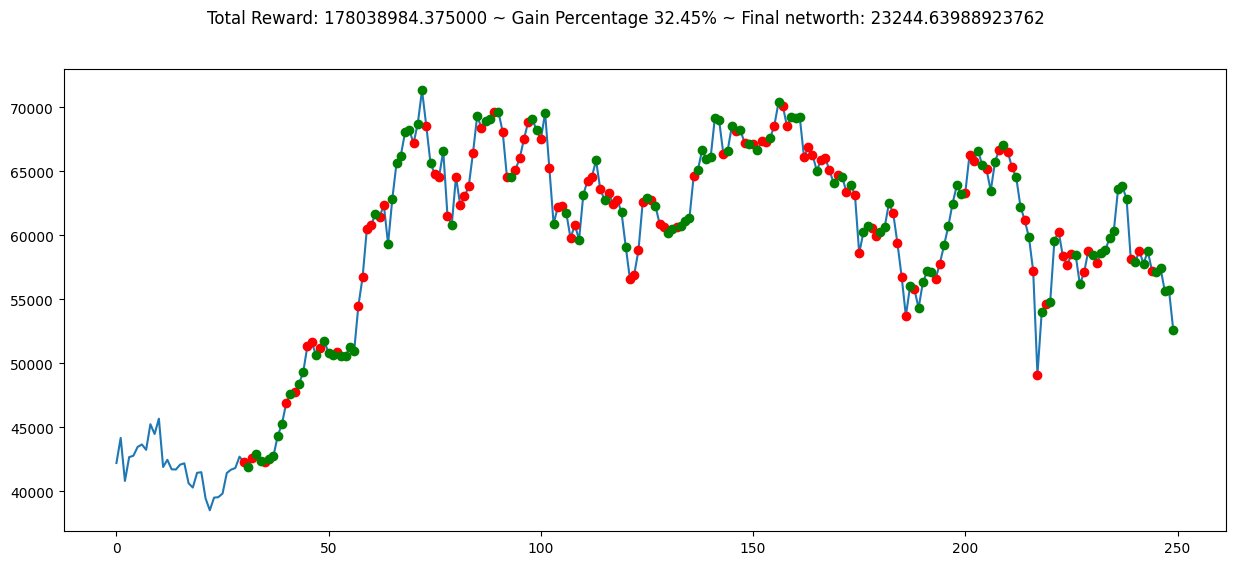

In [21]:
state = new_env.reset()
while True:
    action = new_env.action_space.sample()

    n_state, reward , _ , done, info = new_env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
new_env.render_all()
plt.show()

# 3. Build Environment and Train

In [23]:
env_maker = lambda: new_env
env_d = DummyVecEnv([env_maker])

In [24]:
btc_data_norm = btc_data.copy()
btc_data_norm['Low'] = (btc_data_norm['Low'] - btc_data_norm['Low'].mean()) / btc_data_norm['Low'].std()
btc_data_norm['Volume'] = (btc_data_norm['Volume'] - btc_data_norm['Volume'].mean()) / btc_data_norm['Volume'].std()


In [94]:
train_env = CryptoEnv(df=btc_data_norm, frame_bound=(30,250), window_size=30)

In [42]:
%pip install sb3_contrib

Note: you may need to restart the kernel to use updated packages.


In [27]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from sb3_contrib import RecurrentPPO  # For LSTM-based policies
import numpy as np


In [ ]:

# Wrapping the environment with Monitor for better logging and evaluation
def make_env():
    return Monitor(train_env)


vec_env = DummyVecEnv([make_env])

ppo_params = {
    "policy": "MlpLstmPolicy",  # Using LSTM-based policy
    "env": vec_env,
    "learning_rate": 2e-4,  # Slightly higher learning rate
    "n_steps": 4096,  # More steps per update
    "batch_size": 32,  # Smaller batches
    "gae_lambda": 0.95,
    "gamma": 0.99,
    "clip_range": 0.2,
    "ent_coef": 0.02,  # Higher entropy coefficient
    "vf_coef": 0.5,
    "max_grad_norm": 0.1,  # Stricter gradient clipping
    "verbose": 1
}

ppo_model = RecurrentPPO(**ppo_params)

# Add evaluation callback to monitor progress
eval_callback = EvalCallback(
    vec_env,
    best_model_save_path="./logs/",
    log_path="./logs/",
    eval_freq=5000,  # Evaluate the model every 5000 steps
    deterministic=True,
    render=False
)

In [96]:
ppo_model.learn(total_timesteps=40000, callback=eval_callback)
ppo_model.save("ppo_lstm_crypto_model_copy")

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 219      |
|    ep_rew_mean     | 7.21e+03 |
| time/              |          |
|    fps             | 467      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 4096     |
---------------------------------
Eval num_timesteps=5000, episode_reward=16348.56 +/- 0.00
Episode length: 219.00 +/- 0.00
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 219           |
|    mean_reward          | 1.63e+04      |
| time/                   |               |
|    total_timesteps      | 5000          |
| train/                  |               |
|    approx_kl            | 2.5964531e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | -3.48e-05     |
|    learning_rate        | 0.0002        

# 4. Evaluation

In [1]:
def preprocess_data(coin_to_trade="BTC-USD",  start='2024-01-01', end='2025-01-15'):
  df = yf.download(coin_to_trade, start=start, end=end)
  df.dropna(inplace=True)
  df.reset_index(inplace=True)
  df['Date'] = pd.to_datetime(df['Date'])
  df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
  df = df.set_index('Date')
  df.columns = [col[0] for col in df.columns]  # Use the first level of the MultiIndex
  df.head().sort_values('Date', ascending=True, inplace=True)
  df['SMA'] = TA.SMA(df, 12)
  df['RSI'] = TA.RSI(df)
  df['OBV'] = TA.OBV(df)
  df.fillna(0, inplace=True)
  return df

In [31]:

test_envs_profit = []
def testing_env_and_model(model):
  global test_env
  test_btc_data = preprocess_data()
  print(test_btc_data.head())
  test_env = CryptoEnv(df=test_btc_data, window_size=5, frame_bound=(5,250))
  obs, info = test_env.reset()
  while True:
      action, _ = model.predict(obs)
      print(action)
      obs, reward, done, truncated, info = test_env.step(action)
      print(info)
      if done or truncated:
          test_envs_profit.append(test_env._total_profit)
          break

In [32]:
ppo_modelx = RecurrentPPO.load("../model/ppo_lstm_crypto_model")

c:\Users\friha\.conda\envs\AdvancedDL\lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
c:\Users\friha\.conda\envs\AdvancedDL\lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


In [36]:
for i in range(100):
  testing_env_and_model(ppo_modelx)


[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 214929687.5, 'total_profit': 1.4326292678457702, 'position': <Positions.Long: 1>}
1
{'total_reward': 214929687.5, 'total_profit': 1.4326292678457702, 'position': <Positions.Long: 1>}
0
{'total_reward': 196474101.5625, 'total_profit': 1.393109017642399, 'position': <Positions.Short: 0>}
0
{'total_reward': 196474101.5625, 'total_profit': 1.393109017642399, 'position': <Positions.Short: 0>}
0
{'total_reward': 196474101.5625, 'total_profit': 1.393109017642399, 'position': <Positions.Short: 0>}
0
{'total_reward': 196474101.5625, 'total_profit': 1.393109017642399, 'position': <Positions.Short: 0>}
0
{'total_reward': 196474101.5625, 'total_profit': 1.393109017642399, 'position': <Positions.Short: 0>}
0
{'total_reward': 196474101.5625, 'total_profit': 1.393109017642399, 'position': <Positions.Short: 0>}
0
{'total_reward': 196474101.5625, 'total_profit': 1.393109017642399, 'position': <Positions.Short: 0>}
0
{'total_reward': 196474101.5625, 'total_profit': 1.393109017642399, 


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -64217304.6875, 'total_profit': 0.8554512594278268, 'position': <Positions.Long: 1>}
1
{'total_reward': -64217304.6875, 'total_profit': 0.8554512594278268, 'position': <Positions.Long: 1>}
1
{'total_reward': -64217304.6875, 'total_profit': 0.8554512594278268, 'position': <Positions.Long: 1>}
1
{'total_reward': -64217304.6875, 'total_profit': 0.8554512594278268, 'position': <Positions.Long: 1>}
0
{'total_reward': -2800507.8125, 'total_profit': 0.9797605032333168, 'position': <Positions.Short: 0>}
0
{'total_reward': -2800507.8125, 'total_profit': 0.9797605032333168, 'position': <Positions.Short: 0>}
0
{'total_reward': -2800507.8125, 'total_profit': 0.9797605032333168, 'position': <Positions.Short: 0>}
1
{'total_reward': -35149218.75, 'total_profit': 0.9183872399514197, 'position': <Positions.Long: 1>}
0
{'total_reward': -44866210.9375, 'total_profit': 0.9011065890374573, 'position': <Positions.Short: 0>}
1
{'total_reward': -50506601.5625, 'total_profit': 0.891186175007

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -31600390.625, 'total_profit': 0.8870175478258883, 'position': <Positions.Short: 0>}
0
{'total_reward': -31600390.625, 'total_profit': 0.8870175478258883, 'position': <Positions.Short: 0>}
1
{'total_reward': -22516562.5, 'total_profit': 0.8986595444763907, 'position': <Positions.Long: 1>}
0
{'total_reward': -23015546.875, 'total_profit': 0.8980116396093946, 'position': <Positions.Short: 0>}
0
{'total_reward': -23015546.875, 'total_profit': 0.8980116396093946, 'position': <Positions.Short: 0>}
1
{'total_reward': 7356875.0, 'total_profit': 0.9392598248690283, 'position': <Positions.Long: 1>}
0
{'total_reward': 15145390.625, 'total_profit': 0.9503231015679438, 'position': <Positions.Short: 0>}
1
{'total_reward': 21124296.875, 'total_profit': 0.9588924815114652, 'position': <Positions.Long: 1>}
0
{'total_reward': 8647617.1875, 'total_profit': 0.9408487801851078, 'position': <Positions.Short: 0>}
0
{'total_reward': 8647617.1875, 'total_profit': 0.9408487801851078, 'positi


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'total_reward': -12956601.5625, 'total_profit': 0.9705178388933647, 'position': <Positions.Short: 0>}
1
{'total_reward': -32962929.6875, 'total_profit': 0.9276034315097095, 'position': <Positions.Long: 1>}
1
{'total_reward': -32962929.6875, 'total_profit': 0.9276034315097095, 'position': <Positions.Long: 1>}
1
{'total_reward': -32962929.6875, 'total_profit': 0.9276034315097095, 'position': <Positions.Long: 1>}
1
{'total_reward': -32962929.6875, 'total_profit': 0.9276034315097095, 'position': <Positions.Long: 1>}
0
{'total_reward': -60768632.8125, 'total_profit': 0.8705964009511702, 'position': <Positions.Short: 0>}
1
{'total_reward': -53373320.3125, 'total_profit': 0.886026933023982, 'position': <Positions.Long: 1>}
1
{'total_reward': -53373320.3125, 'total_profit': 0.886026933023982, 'position': <Positions.Long: 1>}
0
{'total_reward': -49759492.1875, 'total_profit': 0.893700931990

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -61413203.125, 'total_profit': 0.8939701811378485, 'position': <Positions.Long: 1>}
1
{'total_reward': -61413203.125, 'total_profit': 0.8939701811378485, 'position': <Positions.Long: 1>}
0
{'total_reward': -39824531.25, 'total_profit': 0.9230547386948436, 'position': <Positions.Short: 0>}
1
{'total_reward': -36505234.375, 'total_profit': 0.9275483073550574, 'position': <Positions.Long: 1>}
0
{'total_reward': -36019140.625, 'total_profit': 0.9282095671456774, 'position': <Positions.Short: 0>}
0
{'total_reward': -36019140.625, 'total_profit': 0.9282095671456774, 'position': <Positions.Short: 0>}
0
{'total_reward': -36019140.625, 'total_profit': 0.9282095671456774, 'position': <Positions.Short: 0>}
0
{'total_reward': -36019140.625, 'total_profit': 0.9282095671456774, 'position': <Positions.Short: 0>}
1
{'total_reward': -20028359.375, 'total_profit': 0.9504848652469802, 'position': <Positions.Long: 1>}
0
{'total_reward': -12500625.0, 'total_profit': 0.9612227120215383, '


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'total_reward': -12956601.5625, 'total_profit': 0.9705178388933647, 'position': <Positions.Short: 0>}
1
{'total_reward': -32962929.6875, 'total_profit': 0.9276034315097095, 'position': <Positions.Long: 1>}
1
{'total_reward': -32962929.6875, 'total_profit': 0.9276034315097095, 'position': <Positions.Long: 1>}
0
{'total_reward': -28623632.8125, 'total_profit': 0.9364998162094024, 'position': <Positions.Short: 0>}
1
{'total_reward': 9125117.1875, 'total_profit': 1.0208638126304677, 'position': <Positions.Long: 1>}
0
{'total_reward': 14728867.1875, 'total_profit': 1.0345157169613426, 'position': <Positions.Short: 0>}
0
{'total_reward': 14728867.1875, 'total_profit': 1.0345157169613426, 'position': <Positions.Short: 0>}
1
{'total_reward': 22316132.8125, 'total_profit': 1.0533361552078966, 'position': <Positions.Long: 1>}
1
{'total_reward': 22316132.8125, 'total_profit': 1.05333615520789

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -194311132.8125, 'total_profit': 0.6863339485585863, 'position': <Positions.Long: 1>}
0
{'total_reward': -153593046.875, 'total_profit': 0.7292493294048572, 'position': <Positions.Short: 0>}
0
{'total_reward': -153593046.875, 'total_profit': 0.7292493294048572, 'position': <Positions.Short: 0>}
0
{'total_reward': -153593046.875, 'total_profit': 0.7292493294048572, 'position': <Positions.Short: 0>}
0
{'total_reward': -153593046.875, 'total_profit': 0.7292493294048572, 'position': <Positions.Short: 0>}
0
{'total_reward': -153593046.875, 'total_profit': 0.7292493294048572, 'position': <Positions.Short: 0>}
1
{'total_reward': -143520703.125, 'total_profit': 0.7400220319745483, 'position': <Positions.Long: 1>}
1
{'total_reward': -143520703.125, 'total_profit': 0.7400220319745483, 'position': <Positions.Long: 1>}
0
{'total_reward': -153088046.875, 'total_profit': 0.7296382781030082, 'position': <Positions.Short: 0>}
0
{'total_reward': -153088046.875, 'total_profit': 0.7296


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -86030937.5, 'total_profit': 0.8076671481259949, 'position': <Positions.Long: 1>}
1
{'total_reward': -86030937.5, 'total_profit': 0.8076671481259949, 'position': <Positions.Long: 1>}
0
{'total_reward': -82160429.6875, 'total_profit': 0.8152123639373448, 'position': <Positions.Short: 0>}
0
{'total_reward': -82160429.6875, 'total_profit': 0.8152123639373448, 'position': <Positions.Short: 0>}
0
{'total_reward': -82160429.6875, 'total_profit': 0.8152123639373448, 'position': <Positions.Short: 0>}
0
{'total_reward': -82160429.6875, 'total_profit': 0.8152123639373448, 'position': <Positions.Short: 0>}
0
{'total_reward': -82160429.6875, 'total_profit': 0.8152123639373448, 'position': <Positions.Short: 0>}
1
{'total_reward': -92885195.3125, 'total_profit': 0.794828127150675, 'position': <Positions.Long: 1>}
0
{'total_reward': -98044960.9375, 'total_profit': 0.7852663367177075, 'position': <Positions.Short: 0>}
1
{'total_reward': -96944804.6875, 'total_profit': 0.787310385138

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 280462929.6875, 'total_profit': 1.5411717714789206, 'position': <Positions.Long: 1>}
0
{'total_reward': 285123007.8125, 'total_profit': 1.5534804620682903, 'position': <Positions.Short: 0>}
0
{'total_reward': 285123007.8125, 'total_profit': 1.5534804620682903, 'position': <Positions.Short: 0>}
1
{'total_reward': 294624218.75, 'total_profit': 1.578988134461049, 'position': <Positions.Long: 1>}
0
{'total_reward': 302085937.5, 'total_profit': 1.5993493536585266, 'position': <Positions.Short: 0>}
1
{'total_reward': 299960312.5, 'total_profit': 1.5935699883903789, 'position': <Positions.Long: 1>}
1
{'total_reward': 299960312.5, 'total_profit': 1.5935699883903789, 'position': <Positions.Long: 1>}
0
{'total_reward': 315446367.1875, 'total_profit': 1.6355228306231986, 'position': <Positions.Short: 0>}
1
{'total_reward': 282967695.3125, 'total_profit': 1.5520275732219821, 'position': <Positions.Long: 1>}
0
{'total_reward': 285103710.9375, 'total_profit': 1.5572384420765737, '


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -69775000.0, 'total_profit': 0.8210278382145111, 'position': <Positions.Short: 0>}
1
{'total_reward': -75313984.375, 'total_profit': 0.8140436612064894, 'position': <Positions.Long: 1>}
1
{'total_reward': -75313984.375, 'total_profit': 0.8140436612064894, 'position': <Positions.Long: 1>}
0
{'total_reward': -51534765.625, 'total_profit': 0.8437721070639926, 'position': <Positions.Short: 0>}
1
{'total_reward': -65133906.25, 'total_profit': 0.8271064484557499, 'position': <Positions.Long: 1>}
1
{'total_reward': -65133906.25, 'total_profit': 0.8271064484557499, 'position': <Positions.Long: 1>}
1
{'total_reward': -65133906.25, 'total_profit': 0.8271064484557499, 'position': <Positions.Long: 1>}
0
{'total_reward': -78614609.375, 'total_profit': 0.8109122370619714, 'position': <Positions.Short: 0>}
0
{'total_reward': -78614609.375, 'total_profit': 0.8109122370619714, 'position': <Positions.Short: 0>}
1
{'total_reward': -56127343.75, 'total_profit': 0.8388568271887539, 'posi

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 115049453.125, 'total_profit': 1.148359539050421, 'position': <Positions.Short: 0>}
0
{'total_reward': 115049453.125, 'total_profit': 1.2163404722122662, 'position': <Positions.Short: 0>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)
[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 13796250.0, 'total_profit': 0.9857580094561184, 'position': <Positions.Short: 0>}
0
{'total_reward': 13796250.0, 'total_profit': 0.9857580094561184, 'position': <Positions.Short: 0>}
1
{'total_reward': 19569531.25, 'total_profit': 0.9943695769206717, 'position': <Positions.Long: 1>}
0
{'total_reward': 50619062.5, 'total_profit': 1.0410884371505207, 'position': <Positions.Short: 0>}
0
{'total_reward': 50619062.5, 'total_profit': 1.0410884371505207, 'position': <Positions.Short: 0>}
0
{'total_reward': 50619062.5, 'total_profit': 1.0410884371505207, 'position': <Positions.Short: 0>}
0
{'total_reward': 50619062.5, 'total_profit': 1.0410884371505207, 'position': <Positions.Short: 0>}
0
{'total_reward': 50619062.5, 'total_profit': 1.0410884371505207, 'position': <Positions.Short: 0>}
1
{'total_reward': 60691406.25, 'total_profit': 1.0564677260026887, 'position': <Positions.Long: 1>}
0
{'total_reward': 61177500.0, 'total_profit': 1.0572208939204712, 'position': <Positions.S


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 78320351.5625, 'total_profit': 1.2054382911410815, 'position': <Positions.Long: 1>}
0
{'total_reward': 87223710.9375, 'total_profit': 1.2276097919935998, 'position': <Positions.Short: 0>}
0
{'total_reward': 87223710.9375, 'total_profit': 1.2276097919935998, 'position': <Positions.Short: 0>}
1
{'total_reward': 63778359.375, 'total_profit': 1.1718758941415428, 'position': <Positions.Long: 1>}
0
{'total_reward': 54061367.1875, 'total_profit': 1.1498255243626478, 'position': <Positions.Short: 0>}
0
{'total_reward': 54061367.1875, 'total_profit': 1.1498255243626478, 'position': <Positions.Short: 0>}
1
{'total_reward': 43639843.75, 'total_profit': 1.1266529943139212, 'position': <Positions.Long: 1>}
0
{'total_reward': 34444765.625, 'total_profit': 1.1066195365477158, 'position': <Positions.Short: 0>}
1
{'total_reward': 35650312.5, 'total_profit': 1.1092523214792687, 'position': <Positions.Long: 1>}
0
{'total_reward': 38195664.0625, 'total_profit': 1.1148243283008488, 'posi

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -31058593.75, 'total_profit': 1.0136303010969836, 'position': <Positions.Short: 0>}
1
{'total_reward': 2412929.6875, 'total_profit': 1.0690814832869087, 'position': <Positions.Long: 1>}
0
{'total_reward': -11070742.1875, 'total_profit': 1.0455215061945873, 'position': <Positions.Short: 0>}
1
{'total_reward': 15186484.375, 'total_profit': 1.0935063092007773, 'position': <Positions.Long: 1>}
1
{'total_reward': 15186484.375, 'total_profit': 1.0935063092007773, 'position': <Positions.Long: 1>}
1
{'total_reward': 15186484.375, 'total_profit': 1.0935063092007773, 'position': <Positions.Long: 1>}
1
{'total_reward': 15186484.375, 'total_profit': 1.0935063092007773, 'position': <Positions.Long: 1>}
1
{'total_reward': 15186484.375, 'total_profit': 1.0935063092007773, 'position': <Positions.Long: 1>}
1
{'total_reward': 15186484.375, 'total_profit': 1.0935063092007773, 'position': <Positions.Long: 1>}
0
{'total_reward': 45954101.5625, 'total_profit': 1.1523143969682224, 'positio


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 76253281.25, 'total_profit': 1.1763786447019564, 'position': <Positions.Long: 1>}
0
{'total_reward': 75047734.375, 'total_profit': 1.1735865231027023, 'position': <Positions.Short: 0>}
0
{'total_reward': 75047734.375, 'total_profit': 1.1735865231027023, 'position': <Positions.Short: 0>}
0
{'total_reward': 75047734.375, 'total_profit': 1.1735865231027023, 'position': <Positions.Short: 0>}
1
{'total_reward': 75910859.375, 'total_profit': 1.175588973295116, 'position': <Positions.Long: 1>}
0
{'total_reward': 83118125.0, 'total_profit': 1.1923384126195107, 'position': <Positions.Short: 0>}
0
{'total_reward': 83118125.0, 'total_profit': 1.1923384126195107, 'position': <Positions.Short: 0>}
1
{'total_reward': 51337851.5625, 'total_profit': 1.122790094201613, 'position': <Positions.Long: 1>}
1
{'total_reward': 51337851.5625, 'total_profit': 1.122790094201613, 'position': <Positions.Long: 1>}
0
{'total_reward': 111483164.0625, 'total_profit': 1.2467353089383848, 'position': 

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 233239218.75, 'total_profit': 1.4777840399291367, 'position': <Positions.Long: 1>}
1
{'total_reward': 233239218.75, 'total_profit': 1.4777840399291367, 'position': <Positions.Long: 1>}
0
{'total_reward': 259200546.875, 'total_profit': 1.5384442119630068, 'position': <Positions.Short: 0>}
1
{'total_reward': 251510546.875, 'total_profit': 1.5206834999511554, 'position': <Positions.Long: 1>}
0
{'total_reward': 240242187.5, 'total_profit': 1.4949587152088784, 'position': <Positions.Short: 0>}
0
{'total_reward': 240242187.5, 'total_profit': 1.4949587152088784, 'position': <Positions.Short: 0>}
1
{'total_reward': 260352070.3125, 'total_profit': 1.542322501731656, 'position': <Positions.Long: 1>}
0
{'total_reward': 283055000.0, 'total_profit': 1.5974876490285836, 'position': <Positions.Short: 0>}
0
{'total_reward': 283055000.0, 'total_profit': 1.5974876490285836, 'position': <Positions.Short: 0>}
1
{'total_reward': 269634375.0, 'total_profit': 1.5655296512346835, 'position'


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 34878046.875, 'total_profit': 1.0791494432860833, 'position': <Positions.Short: 0>}
1
{'total_reward': 32961835.9375, 'total_profit': 1.0743152295188507, 'position': <Positions.Long: 1>}
0
{'total_reward': 48523515.625, 'total_profit': 1.1133982738795327, 'position': <Positions.Short: 0>}
1
{'total_reward': 39236523.4375, 'total_profit': 1.0905526350963874, 'position': <Positions.Long: 1>}
0
{'total_reward': 55681484.375, 'total_profit': 1.1301765096553498, 'position': <Positions.Short: 0>}
1
{'total_reward': 48560625.0, 'total_profit': 1.1132754811901262, 'position': <Positions.Long: 1>}
1
{'total_reward': 48560625.0, 'total_profit': 1.1132754811901262, 'position': <Positions.Long: 1>}
0
{'total_reward': 56451523.4375, 'total_profit': 1.1317240719619175, 'position': <Positions.Short: 0>}
1
{'total_reward': 47548164.0625, 'total_profit': 1.1112843213613106, 'position': <Positions.Long: 1>}
0
{'total_reward': 68296132.8125, 'total_profit': 1.1580558644566163, 'positio

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 152562734.375, 'total_profit': 1.293051677419088, 'position': <Positions.Long: 1>}
0
{'total_reward': 151982382.8125, 'total_profit': 1.2917392443045246, 'position': <Positions.Short: 0>}
1
{'total_reward': 157284414.0625, 'total_profit': 1.3038417654053789, 'position': <Positions.Long: 1>}
0
{'total_reward': 169347070.3125, 'total_profit': 1.33163420621657, 'position': <Positions.Short: 0>}
1
{'total_reward': 155058984.375, 'total_profit': 1.299508536893706, 'position': <Positions.Long: 1>}
1
{'total_reward': 155058984.375, 'total_profit': 1.299508536893706, 'position': <Positions.Long: 1>}
0
{'total_reward': 187686171.875, 'total_profit': 1.3710984496295004, 'position': <Positions.Short: 0>}
0
{'total_reward': 187686171.875, 'total_profit': 1.3710984496295004, 'position': <Positions.Short: 0>}
1
{'total_reward': 180104218.75, 'total_profit': 1.3546617084575403, 'position': <Positions.Long: 1>}
1
{'total_reward': 180104218.75, 'total_profit': 1.3546617084575403, 'po


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -137444296.875, 'total_profit': 0.7173493393003391, 'position': <Positions.Long: 1>}
0
{'total_reward': -138307421.875, 'total_profit': 0.7161274272782168, 'position': <Positions.Short: 0>}
0
{'total_reward': -138307421.875, 'total_profit': 0.7161274272782168, 'position': <Positions.Short: 0>}
0
{'total_reward': -138307421.875, 'total_profit': 0.7161274272782168, 'position': <Positions.Short: 0>}
0
{'total_reward': -138307421.875, 'total_profit': 0.7161274272782168, 'position': <Positions.Short: 0>}
1
{'total_reward': -199837226.5625, 'total_profit': 0.6384672132813488, 'position': <Positions.Long: 1>}
0
{'total_reward': -162234179.6875, 'total_profit': 0.680781236455572, 'position': <Positions.Short: 0>}
0
{'total_reward': -162234179.6875, 'total_profit': 0.680781236455572, 'position': <Positions.Short: 0>}
0
{'total_reward': -162234179.6875, 'total_profit': 0.680781236455572, 'position': <Positions.Short: 0>}
0
{'total_reward': -162234179.6875, 'total_profit': 0.68

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -115947929.6875, 'total_profit': 0.7346548608105729, 'position': <Positions.Short: 0>}
0
{'total_reward': -115947929.6875, 'total_profit': 0.7346548608105729, 'position': <Positions.Short: 0>}
1
{'total_reward': -98787226.5625, 'total_profit': 0.7545466431696477, 'position': <Positions.Long: 1>}
1
{'total_reward': -98787226.5625, 'total_profit': 0.7545466431696477, 'position': <Positions.Long: 1>}
1
{'total_reward': -98787226.5625, 'total_profit': 0.7545466431696477, 'position': <Positions.Long: 1>}
1
{'total_reward': -98787226.5625, 'total_profit': 0.7545466431696477, 'position': <Positions.Long: 1>}
0
{'total_reward': -130178671.875, 'total_profit': 0.7171740885935317, 'position': <Positions.Short: 0>}
0
{'total_reward': -130178671.875, 'total_profit': 0.7171740885935317, 'position': <Positions.Short: 0>}
0
{'total_reward': -130178671.875, 'total_profit': 0.7171740885935317, 'position': <Positions.Short: 0>}
1
{'total_reward': -127635195.3125, 'total_profit': 0.720


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 65646132.8125, 'total_profit': 1.1702133472455107, 'position': <Positions.Long: 1>}
1
{'total_reward': 65646132.8125, 'total_profit': 1.1702133472455107, 'position': <Positions.Long: 1>}
0
{'total_reward': 94740000.0, 'total_profit': 1.2585943280083898, 'position': <Positions.Short: 0>}
1
{'total_reward': 92083710.9375, 'total_profit': 1.2505764818157863, 'position': <Positions.Long: 1>}
0
{'total_reward': 93297929.6875, 'total_profit': 1.2542181657082143, 'position': <Positions.Short: 0>}
1
{'total_reward': 84367539.0625, 'total_profit': 1.2279940908902582, 'position': <Positions.Long: 1>}
1
{'total_reward': 84367539.0625, 'total_profit': 1.2279940908902582, 'position': <Positions.Long: 1>}
1
{'total_reward': 84367539.0625, 'total_profit': 1.2279940908902582, 'position': <Positions.Long: 1>}
0
{'total_reward': 83097187.5, 'total_profit': 1.2243416960920175, 'position': <Positions.Short: 0>}
0
{'total_reward': 83097187.5, 'total_profit': 1.2243416960920175, 'position

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 262679960.9375, 'total_profit': 1.6354893236506076, 'position': <Positions.Long: 1>}
0
{'total_reward': 249243789.0625, 'total_profit': 1.5980974999123079, 'position': <Positions.Short: 0>}
0
{'total_reward': 249243789.0625, 'total_profit': 1.5980974999123079, 'position': <Positions.Short: 0>}
1
{'total_reward': 266370937.5, 'total_profit': 1.6472262795100978, 'position': <Positions.Long: 1>}
0
{'total_reward': 235233398.4375, 'total_profit': 1.555163240301212, 'position': <Positions.Short: 0>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.6


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 296932031.25, 'total_profit': 1.7798786667419144, 'position': <Positions.Short: 0>}
1
{'total_reward': 327421875.0, 'total_profit': 1.8671183969926264, 'position': <Positions.Long: 1>}
1
{'total_reward': 327421875.0, 'total_profit': 1.8671183969926264, 'position': <Positions.Long: 1>}
1
{'total_reward': 327421875.0, 'total_profit': 1.8671183969926264, 'position': <Positions.Long: 1>}
1
{'total_reward': 327421875.0, 'total_profit': 1.8671183969926264, 'position': <Positions.Long: 1>}
1
{'total_reward': 327421875.0, 'total_profit': 1.8671183969926264, 'position': <Positions.Long: 1>}
1
{'total_reward': 327421875.0, 'total_profit': 1.8671183969926264, 'position': <Positions.Long: 1>}
1
{'total_reward': 327421875.0, 'total_profit': 1.8671183969926264, 'position': <Positions.Long: 1>}
0
{'total_reward': 348140585.9375, 'total_profit': 1.9293059240183694, 'position': <Positions.Short: 0>}
1
{'total_reward': 345436015.625, 'total_profit': 1.9212221184966487, 'position': <Po

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 323335546.875, 'total_profit': 1.8369795214047826, 'position': <Positions.Short: 0>}
1
{'total_reward': 323915898.4375, 'total_profit': 1.8388459103276205, 'position': <Positions.Long: 1>}
1
{'total_reward': 323915898.4375, 'total_profit': 1.8388459103276205, 'position': <Positions.Long: 1>}
0
{'total_reward': 330676523.4375, 'total_profit': 1.8606100203598293, 'position': <Positions.Short: 0>}
1
{'total_reward': 316388437.5, 'total_profit': 1.8157228118653022, 'position': <Positions.Long: 1>}
0
{'total_reward': 331185234.375, 'total_profit': 1.8610867000402045, 'position': <Positions.Short: 0>}
0
{'total_reward': 331185234.375, 'total_profit': 1.8610867000402045, 'position': <Positions.Short: 0>}
0
{'total_reward': 331185234.375, 'total_profit': 1.8610867000402045, 'position': <Positions.Short: 0>}
0
{'total_reward': 331185234.375, 'total_profit': 1.8610867000402045, 'position': <Positions.Short: 0>}
0
{'total_reward': 331185234.375, 'total_profit': 1.86108670004020


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -100889179.6875, 'total_profit': 0.7935046618098286, 'position': <Positions.Long: 1>}
0
{'total_reward': -94868828.125, 'total_profit': 0.8049615650483718, 'position': <Positions.Short: 0>}
0
{'total_reward': -94868828.125, 'total_profit': 0.8049615650483718, 'position': <Positions.Short: 0>}
1
{'total_reward': -97722734.375, 'total_profit': 0.7995668883302526, 'position': <Positions.Long: 1>}
0
{'total_reward': -94658007.8125, 'total_profit': 0.805321237737173, 'position': <Positions.Short: 0>}
0
{'total_reward': -94658007.8125, 'total_profit': 0.805321237737173, 'position': <Positions.Short: 0>}
1
{'total_reward': -88398085.9375, 'total_profit': 0.8172489971484356, 'position': <Positions.Long: 1>}
0
{'total_reward': -85756054.6875, 'total_profit': 0.8223577261607566, 'position': <Positions.Short: 0>}
1
{'total_reward': -88225429.6875, 'total_profit': 0.8176104049596721, 'position': <Positions.Long: 1>}
1
{'total_reward': -88225429.6875, 'total_profit': 0.8176104049

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 256072890.625, 'total_profit': 1.4067295833375804, 'position': <Positions.Long: 1>}
0
{'total_reward': 251226328.125, 'total_profit': 1.3965716538245572, 'position': <Positions.Short: 0>}
0
{'total_reward': 251226328.125, 'total_profit': 1.3965716538245572, 'position': <Positions.Short: 0>}
1
{'total_reward': 244405312.5, 'total_profit': 1.3824203247173432, 'position': <Positions.Long: 1>}
0
{'total_reward': 247148437.5, 'total_profit': 1.3880537171539336, 'position': <Positions.Short: 0>}
0
{'total_reward': 247148437.5, 'total_profit': 1.3880537171539336, 'position': <Positions.Short: 0>}
1
{'total_reward': 219139687.5, 'total_profit': 1.3328224896287337, 'position': <Positions.Long: 1>}
0
{'total_reward': 216423828.125, 'total_profit': 1.3276801030781127, 'position': <Positions.Short: 0>}
0
{'total_reward': 216423828.125, 'total_profit': 1.3276801030781127, 'position': <Positions.Short: 0>}
0
{'total_reward': 216423828.125, 'total_profit': 1.3276801030781127, 'posi


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -265535898.4375, 'total_profit': 0.6048062176428493, 'position': <Positions.Long: 1>}
0
{'total_reward': -288869492.1875, 'total_profit': 0.5819532996965827, 'position': <Positions.Short: 0>}
1
{'total_reward': -262453671.875, 'total_profit': 0.6090286192405522, 'position': <Positions.Long: 1>}
1
{'total_reward': -262453671.875, 'total_profit': 0.6090286192405522, 'position': <Positions.Long: 1>}
0
{'total_reward': -269842109.375, 'total_profit': 0.6011033890545273, 'position': <Positions.Short: 0>}
1
{'total_reward': -267385742.1875, 'total_profit': 0.60374981469511, 'position': <Positions.Long: 1>}
1
{'total_reward': -267385742.1875, 'total_profit': 0.60374981469511, 'position': <Positions.Long: 1>}
0
{'total_reward': -262150234.375, 'total_profit': 0.6094152506673225, 'position': <Positions.Short: 0>}
1
{'total_reward': -270765625.0, 'total_profit': 0.6002328479168054, 'position': <Positions.Long: 1>}
1
{'total_reward': -270765625.0, 'total_profit': 0.600232847916


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -35561367.1875, 'total_profit': 0.9222995742879273, 'position': <Positions.Long: 1>}
1
{'total_reward': -35561367.1875, 'total_profit': 0.9222995742879273, 'position': <Positions.Long: 1>}
0
{'total_reward': -42484375.0, 'total_profit': 0.9071651951336186, 'position': <Positions.Short: 0>}
1
{'total_reward': -22015468.75, 'total_profit': 0.9542339440620528, 'position': <Positions.Long: 1>}
1
{'total_reward': -22015468.75, 'total_profit': 0.9542339440620528, 'position': <Positions.Long: 1>}
1
{'total_reward': -22015468.75, 'total_profit': 0.9542339440620528, 'position': <Positions.Long: 1>}
1
{'total_reward': -22015468.75, 'total_profit': 0.9542339440620528, 'position': <Positions.Long: 1>}
1
{'total_reward': -22015468.75, 'total_profit': 0.9542339440620528, 'position': <Positions.Long: 1>}
1
{'total_reward': -22015468.75, 'total_profit': 0.9542339440620528, 'position': <Positions.Long: 1>}
0
{'total_reward': 452460.9375, 'total_profit': 1.008580191491461, 'position':

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'tot

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -349101.5625, 'total_profit': 1.0138752740753618, 'position': <Positions.Short: 0>}
1
{'total_reward': -5954804.6875, 'total_profit': 1.004608277785282, 'position': <Positions.Long: 1>}
1
{'total_reward': -5954804.6875, 'total_profit': 1.004608277785282, 'position': <Positions.Long: 1>}
0
{'total_reward': 31934257.8125, 'total_profit': 1.0666715555527473, 'position': <Positions.Short: 0>}
0
{'total_reward': 31934257.8125, 'total_profit': 1.0666715555527473, 'position': <Positions.Short: 0>}
0
{'total_reward': 31934257.8125, 'total_profit': 1.0666715555527473, 'position': <Positions.Short: 0>}
0
{'total_reward': 31934257.8125, 'total_profit': 1.0666715555527473, 'position': <Positions.Short: 0>}
0
{'total_reward': 31934257.8125, 'total_profit': 1.0666715555527473, 'position': <Positions.Short: 0>}
0
{'total_reward': 31934257.8125, 'total_profit': 1.0666715555527473, 'position': <Positions.Short: 0>}
1
{'total_reward': 19557890.625, 'total_profit': 1.0467768475857784, 


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -46001328.125, 'total_profit': 0.9200762599503914, 'position': <Positions.Long: 1>}
1
{'total_reward': -46001328.125, 'total_profit': 0.9200762599503914, 'position': <Positions.Long: 1>}
1
{'total_reward': -46001328.125, 'total_profit': 0.9200762599503914, 'position': <Positions.Long: 1>}
1
{'total_reward': -46001328.125, 'total_profit': 0.9200762599503914, 'position': <Positions.Long: 1>}
0
{'total_reward': -169192343.75, 'total_profit': 0.7511208563370161, 'position': <Positions.Short: 0>}
0
{'total_reward': -169192343.75, 'total_profit': 0.7511208563370161, 'position': <Positions.Short: 0>}
0
{'total_reward': -169192343.75, 'total_profit': 0.7511208563370161, 'position': <Positions.Short: 0>}
1
{'total_reward': -205013320.3125, 'total_profit': 0.7050087277653324, 'position': <Positions.Long: 1>}
1
{'total_reward': -205013320.3125, 'total_profit': 0.7050087277653324, 'position': <Positions.Long: 1>}
1
{'total_reward': -205013320.3125, 'total_profit': 0.705008727765


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 50071992.1875, 'total_profit': 1.1689556231918798, 'position': <Positions.Short: 0>}
0
{'total_reward': 50071992.1875, 'total_profit': 1.1689556231918798, 'position': <Positions.Short: 0>}
1
{'total_reward': 29610546.875, 'total_profit': 1.1308982954075815, 'position': <Positions.Long: 1>}
1
{'total_reward': 29610546.875, 'total_profit': 1.1308982954075815, 'position': <Positions.Long: 1>}
0
{'total_reward': 63428359.375, 'total_profit': 1.1917500238164698, 'position': <Positions.Short: 0>}
1
{'total_reward': 45201640.625, 'total_profit': 1.1598312896221787, 'position': <Positions.Long: 1>}
0
{'total_reward': 47070156.25, 'total_profit': 1.1630158008515, 'position': <Positions.Short: 0>}
1
{'total_reward': 57521093.75, 'total_profit': 1.1811043835655737, 'position': <Positions.Long: 1>}
1
{'total_reward': 57521093.75, 'total_profit': 1.1811043835655737, 'position': <Positions.Long: 1>}
0
{'total_reward': 98913203.125, 'total_profit': 1.253860516530256, 'position': <P

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 401524960.9375, 'total_profit': 1.9791221281026539, 'position': <Positions.Short: 0>}
0
{'total_reward': 401524960.9375, 'total_profit': 1.9791221281026539, 'position': <Positions.Short: 0>}
0
{'total_reward': 401524960.9375, 'total_profit': 1.9791221281026539, 'position': <Positions.Short: 0>}
0
{'total_reward': 401524960.9375, 'total_profit': 1.9791221281026539, 'position': <Positions.Short: 0>}
1
{'total_reward': 383851523.4375, 'total_profit': 1.9224802791391213, 'position': <Positions.Long: 1>}
0
{'total_reward': 360517929.6875, 'total_profit': 1.84983836047018, 'position': <Positions.Short: 0>}
0
{'total_reward': 360517929.6875, 'total_profit': 1.84983836047018, 'position': <Positions.Short: 0>}
1
{'total_reward': 417538046.875, 'total_profit': 2.04619567417441, 'position': <Positions.Long: 1>}
1
{'total_reward': 417538046.875, 'total_profit': 2.04619567417441, 'position': <Positions.Long: 1>}
1
{'total_reward': 417538046.875, 'total_profit': 2.04619567417441, 


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 56039804.6875, 'total_profit': 1.1375218401406963, 'position': <Positions.Short: 0>}
0
{'total_reward': 56039804.6875, 'total_profit': 1.1375218401406963, 'position': <Positions.Short: 0>}
1
{'total_reward': 76006875.0, 'total_profit': 1.1950957506149722, 'position': <Positions.Long: 1>}
1
{'total_reward': 76006875.0, 'total_profit': 1.1950957506149722, 'position': <Positions.Long: 1>}
0
{'total_reward': 76593671.875, 'total_profit': 1.1968733749073572, 'position': <Positions.Short: 0>}
1
{'total_reward': 76225000.0, 'total_profit': 1.1957575581614621, 'position': <Positions.Long: 1>}
1
{'total_reward': 76225000.0, 'total_profit': 1.1957575581614621, 'position': <Positions.Long: 1>}
0
{'total_reward': 95081171.875, 'total_profit': 1.25277368618656, 'position': <Positions.Short: 0>}
1
{'total_reward': 92424882.8125, 'total_profit': 1.2447929202586858, 'position': <Positions.Long: 1>}
1
{'total_reward': 92424882.8125, 'total_profit': 1.2447929202586858, 'position': <Po

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 476359921.875, 'total_profit': 2.289279828227187, 'position': <Positions.Short: 0>}
0
{'total_reward': 476359921.875, 'total_profit': 2.289279828227187, 'position': <Positions.Short: 0>}
1
{'total_reward': 507231328.125, 'total_profit': 2.3961603959205418, 'position': <Positions.Long: 1>}
0
{'total_reward': 515019843.75, 'total_profit': 2.424384093744249, 'position': <Positions.Short: 0>}
0
{'total_reward': 515019843.75, 'total_profit': 2.424384093744249, 'position': <Positions.Short: 0>}
0
{'total_reward': 515019843.75, 'total_profit': 2.424384093744249, 'position': <Positions.Short: 0>}
0
{'total_reward': 515019843.75, 'total_profit': 2.424384093744249, 'position': <Positions.Short: 0>}
1
{'total_reward': 523861875.0, 'total_profit': 2.4568546191606866, 'position': <Positions.Long: 1>}
1
{'total_reward': 523861875.0, 'total_profit': 2.4568546191606866, 'position': <Positions.Long: 1>}
0
{'total_reward': 504348945.3125, 'total_profit': 2.3842376703523556, 'position'


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'tot

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -151763125.0, 'total_profit': 0.8273524262313278, 'position': <Positions.Short: 0>}
1
{'total_reward': -159936679.6875, 'total_profit': 0.815793981907528, 'position': <Positions.Long: 1>}
0
{'total_reward': -160270468.75, 'total_profit': 0.8153285520814579, 'position': <Positions.Short: 0>}
1
{'total_reward': -137157656.25, 'total_profit': 0.8488826808835266, 'position': <Positions.Long: 1>}
1
{'total_reward': -137157656.25, 'total_profit': 0.8488826808835266, 'position': <Positions.Long: 1>}
0
{'total_reward': -110625273.4375, 'total_profit': 0.8889863820101618, 'position': <Positions.Short: 0>}
0
{'total_reward': -110625273.4375, 'total_profit': 0.8889863820101618, 'position': <Positions.Short: 0>}
1
{'total_reward': -101124062.5, 'total_profit': 0.9035832655549658, 'position': <Positions.Long: 1>}
0
{'total_reward': -93662343.75, 'total_profit': 0.9152350674473321, 'position': <Positions.Short: 0>}
1
{'total_reward': -95787968.75, 'total_profit': 0.911927798932860


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -253385859.375, 'total_profit': 0.6475679994269812, 'position': <Positions.Short: 0>}
0
{'total_reward': -253385859.375, 'total_profit': 0.6475679994269812, 'position': <Positions.Short: 0>}
1
{'total_reward': -283833242.1875, 'total_profit': 0.6170376921186788, 'position': <Positions.Long: 1>}
1
{'total_reward': -283833242.1875, 'total_profit': 0.6170376921186788, 'position': <Positions.Long: 1>}
1
{'total_reward': -283833242.1875, 'total_profit': 0.6170376921186788, 'position': <Positions.Long: 1>}
0
{'total_reward': -291383906.25, 'total_profit': 0.6098234153249423, 'position': <Positions.Short: 0>}
0
{'total_reward': -291383906.25, 'total_profit': 0.6098234153249423, 'position': <Positions.Short: 0>}
0
{'total_reward': -291383906.25, 'total_profit': 0.6098234153249423, 'position': <Positions.Short: 0>}
0
{'total_reward': -291383906.25, 'total_profit': 0.6098234153249423, 'position': <Positions.Short: 0>}
0
{'total_reward': -291383906.25, 'total_profit': 0.6098234

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -236007460.9375, 'total_profit': 0.6521441743357532, 'position': <Positions.Short: 0>}
1
{'total_reward': -262358203.125, 'total_profit': 0.6231287038000712, 'position': <Positions.Long: 1>}
1
{'total_reward': -262358203.125, 'total_profit': 0.6231287038000712, 'position': <Positions.Long: 1>}
1
{'total_reward': -262358203.125, 'total_profit': 0.6231287038000712, 'position': <Positions.Long: 1>}
0
{'total_reward': -215649843.75, 'total_profit': 0.6722721309102743, 'position': <Positions.Short: 0>}
0
{'total_reward': -215649843.75, 'total_profit': 0.6722721309102743, 'position': <Positions.Short: 0>}
1
{'total_reward': -209982421.875, 'total_profit': 0.6782883747843589, 'position': <Positions.Long: 1>}
0
{'total_reward': -180279687.5, 'total_profit': 0.7101014588904218, 'position': <Positions.Short: 0>}
0
{'total_reward': -180279687.5, 'total_profit': 0.7101014588904218, 'position': <Positions.Short: 0>}
0
{'total_reward': -180279687.5, 'total_profit': 0.7101014588904


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'tot

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -120221289.0625, 'total_profit': 0.9140298270386644, 'position': <Positions.Short: 0>}
0
{'total_reward': -120221289.0625, 'total_profit': 0.9140298270386644, 'position': <Positions.Short: 0>}
1
{'total_reward': -63201171.875, 'total_profit': 1.0110525968752873, 'position': <Positions.Long: 1>}
0
{'total_reward': -39985312.5, 'total_profit': 1.0547487973627971, 'position': <Positions.Short: 0>}
0
{'total_reward': -39985312.5, 'total_profit': 1.0547487973627971, 'position': <Positions.Short: 0>}
1
{'total_reward': -22805898.4375, 'total_profit': 1.0881059826916715, 'position': <Positions.Long: 1>}
1
{'total_reward': -22805898.4375, 'total_profit': 1.0881059826916715, 'position': <Positions.Long: 1>}
0
{'total_reward': 5768046.875, 'total_profit': 1.1453425328293794, 'position': <Positions.Short: 0>}
1
{'total_reward': 6348398.4375, 'total_profit': 1.146506211896685, 'position': <Positions.Long: 1>}
1
{'total_reward': 6348398.4375, 'total_profit': 1.146506211896685, 'p


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'tot

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 254417031.25, 'total_profit': 1.4953076959593063, 'position': <Positions.Long: 1>}
1
{'total_reward': 254417031.25, 'total_profit': 1.4953076959593063, 'position': <Positions.Long: 1>}
1
{'total_reward': 254417031.25, 'total_profit': 1.4953076959593063, 'position': <Positions.Long: 1>}
0
{'total_reward': 235427421.875, 'total_profit': 1.4476548454869922, 'position': <Positions.Short: 0>}
0
{'total_reward': 235427421.875, 'total_profit': 1.4476548454869922, 'position': <Positions.Short: 0>}
1
{'total_reward': 227587656.25, 'total_profit': 1.4282453688066028, 'position': <Positions.Long: 1>}
1
{'total_reward': 227587656.25, 'total_profit': 1.4282453688066028, 'position': <Positions.Long: 1>}
1
{'total_reward': 227587656.25, 'total_profit': 1.4282453688066028, 'position': <Positions.Long: 1>}
0
{'total_reward': 231007226.5625, 'total_profit': 1.436597927454353, 'position': <Positions.Short: 0>}
1
{'total_reward': 234701523.4375, 'total_profit': 1.4456785646155408, 'posi


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -38440859.375, 'total_profit': 0.9159228257755434, 'position': <Positions.Long: 1>}
1
{'total_reward': -38440859.375, 'total_profit': 0.9159228257755434, 'position': <Positions.Long: 1>}
0
{'total_reward': -37101054.6875, 'total_profit': 0.9183388507352139, 'position': <Positions.Short: 0>}
0
{'total_reward': -37101054.6875, 'total_profit': 0.9183388507352139, 'position': <Positions.Short: 0>}
1
{'total_reward': -33692578.125, 'total_profit': 0.9245266655796038, 'position': <Positions.Long: 1>}
1
{'total_reward': -33692578.125, 'total_profit': 0.9245266655796038, 'position': <Positions.Long: 1>}
0
{'total_reward': -30236718.75, 'total_profit': 0.9308427736050704, 'position': <Positions.Short: 0>}
1
{'total_reward': -65768398.4375, 'total_profit': 0.870138183030294, 'position': <Positions.Long: 1>}
1
{'total_reward': -65768398.4375, 'total_profit': 0.870138183030294, 'position': <Positions.Long: 1>}
1
{'total_reward': -65768398.4375, 'total_profit': 0.870138183030294,

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -382969843.75, 'total_profit': 0.5096060739101469, 'position': <Positions.Long: 1>}
1
{'total_reward': -382969843.75, 'total_profit': 0.5096060739101469, 'position': <Positions.Long: 1>}
0
{'total_reward': -390700117.1875, 'total_profit': 0.5029950026837701, 'position': <Positions.Short: 0>}
1
{'total_reward': -387005820.3125, 'total_profit': 0.5061743996646327, 'position': <Positions.Long: 1>}
1
{'total_reward': -387005820.3125, 'total_profit': 0.5061743996646327, 'position': <Positions.Long: 1>}
1
{'total_reward': -387005820.3125, 'total_profit': 0.5061743996646327, 'position': <Positions.Long: 1>}
0
{'total_reward': -383225390.625, 'total_profit': 0.5094484898963447, 'position': <Positions.Short: 0>}
1
{'total_reward': -393143476.5625, 'total_profit': 0.5010012208438948, 'position': <Positions.Long: 1>}
1
{'total_reward': -393143476.5625, 'total_profit': 0.5010012208438948, 'position': <Positions.Long: 1>}
1
{'total_reward': -393143476.5625, 'total_profit': 0.5010


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -15819648.4375, 'total_profit': 0.9693217134743531, 'position': <Positions.Long: 1>}
0
{'total_reward': -11808398.4375, 'total_profit': 0.9784974166661473, 'position': <Positions.Short: 0>}
0
{'total_reward': -11808398.4375, 'total_profit': 0.9784974166661473, 'position': <Positions.Short: 0>}
0
{'total_reward': -11808398.4375, 'total_profit': 0.9784974166661473, 'position': <Positions.Short: 0>}
1
{'total_reward': -53102031.25, 'total_profit': 0.8923542761906391, 'position': <Positions.Long: 1>}
0
{'total_reward': -45981171.875, 'total_profit': 0.9059014102769982, 'position': <Positions.Short: 0>}
1
{'total_reward': -47264726.5625, 'total_profit': 0.9034660596250857, 'position': <Positions.Long: 1>}
1
{'total_reward': -47264726.5625, 'total_profit': 0.9034660596250857, 'position': <Positions.Long: 1>}
0
{'total_reward': -31754023.4375, 'total_profit': 0.932816080693986, 'position': <Positions.Short: 0>}
0
{'total_reward': -31754023.4375, 'total_profit': 0.9328160806

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -176378398.4375, 'total_profit': 0.7078565144487299, 'position': <Positions.Short: 0>}
1
{'total_reward': -150121171.875, 'total_profit': 0.7403439909867294, 'position': <Positions.Long: 1>}
1
{'total_reward': -150121171.875, 'total_profit': 0.7403439909867294, 'position': <Positions.Long: 1>}
1
{'total_reward': -150121171.875, 'total_profit': 0.7403439909867294, 'position': <Positions.Long: 1>}
0
{'total_reward': -176024140.625, 'total_profit': 0.7068239075189968, 'position': <Positions.Short: 0>}
0
{'total_reward': -176024140.625, 'total_profit': 0.7068239075189968, 'position': <Positions.Short: 0>}
1
{'total_reward': -225697656.25, 'total_profit': 0.6479017866322869, 'position': <Positions.Long: 1>}
1
{'total_reward': -225697656.25, 'total_profit': 0.6479017866322869, 'position': <Positions.Long: 1>}
0
{'total_reward': -238088007.8125, 'total_profit': 0.6344296919098857, 'position': <Positions.Short: 0>}
0
{'total_reward': -238088007.8125, 'total_profit': 0.634429


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 930507.8125, 'total_profit': 1.0033310656022985, 'position': <Positions.Long: 1>}
1
{'total_reward': 930507.8125, 'total_profit': 1.0033310656022985, 'position': <Positions.Long: 1>}
1
{'total_reward': 930507.8125, 'total_profit': 1.0033310656022985, 'position': <Positions.Long: 1>}
0
{'total_reward': 33279218.75, 'total_profit': 1.0703808754933721, 'position': <Positions.Short: 0>}
0
{'total_reward': 33279218.75, 'total_profit': 1.0703808754933721, 'position': <Positions.Short: 0>}
1
{'total_reward': 37355820.3125, 'total_profit': 1.0788977550853607, 'position': <Positions.Long: 1>}
0
{'total_reward': 42136953.125, 'total_profit': 1.0889660295093284, 'position': <Positions.Short: 0>}
0
{'total_reward': 42136953.125, 'total_profit': 1.0889660295093284, 'position': <Positions.Short: 0>}
1
{'total_reward': 52537578.125, 'total_profit': 1.1113175810100213, 'position': <Positions.Long: 1>}
1
{'total_reward': 52537578.125, 'total_profit': 1.1113175810100213, 'position': <

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -64979804.6875, 'total_profit': 0.934138057617422, 'position': <Positions.Short: 0>}
0
{'total_reward': -64979804.6875, 'total_profit': 0.934138057617422, 'position': <Positions.Short: 0>}
1
{'total_reward': -41533203.125, 'total_profit': 0.9731368797242274, 'position': <Positions.Long: 1>}
1
{'total_reward': -41533203.125, 'total_profit': 0.9731368797242274, 'position': <Positions.Long: 1>}
1
{'total_reward': -41533203.125, 'total_profit': 0.9731368797242274, 'position': <Positions.Long: 1>}
1
{'total_reward': -41533203.125, 'total_profit': 0.9731368797242274, 'position': <Positions.Long: 1>}
1
{'total_reward': -41533203.125, 'total_profit': 0.9731368797242274, 'position': <Positions.Long: 1>}
1
{'total_reward': -41533203.125, 'total_profit': 0.9731368797242274, 'position': <Positions.Long: 1>}
1
{'total_reward': -41533203.125, 'total_profit': 0.9731368797242274, 'position': <Positions.Long: 1>}
0
{'total_reward': -4996601.5625, 'total_profit': 1.03644546686853, 'po


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 117685859.375, 'total_profit': 1.306802611528362, 'position': <Positions.Short: 0>}
1
{'total_reward': 115140507.8125, 'total_profit': 1.3002710621152096, 'position': <Positions.Long: 1>}
0
{'total_reward': 111495351.5625, 'total_profit': 1.290964091563701, 'position': <Positions.Short: 0>}
1
{'total_reward': 111258671.875, 'total_profit': 1.2903600663371368, 'position': <Positions.Long: 1>}
1
{'total_reward': 111258671.875, 'total_profit': 1.2903600663371368, 'position': <Positions.Long: 1>}
0
{'total_reward': 114714531.25, 'total_profit': 1.2991754460056335, 'position': <Positions.Short: 0>}
1
{'total_reward': 79182851.5625, 'total_profit': 1.2144501671820853, 'position': <Positions.Long: 1>}
0
{'total_reward': 101725117.1875, 'total_profit': 1.2646967616189042, 'position': <Positions.Short: 0>}
1
{'total_reward': 64122070.3125, 'total_profit': 1.1860894007116014, 'position': <Positions.Long: 1>}
0
{'total_reward': 67160039.0625, 'total_profit': 1.1920453917677463,

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'tot

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 4176875.0, 'total_profit': 0.9988977579018423, 'position': <Positions.Long: 1>}
1
{'total_reward': 4176875.0, 'total_profit': 0.9988977579018423, 'position': <Positions.Long: 1>}
0
{'total_reward': 7293671.875, 'total_profit': 1.0035936498928548, 'position': <Positions.Short: 0>}
0
{'total_reward': 7293671.875, 'total_profit': 1.0035936498928548, 'position': <Positions.Short: 0>}
1
{'total_reward': 21936679.6875, 'total_profit': 1.0261512926489809, 'position': <Positions.Long: 1>}
1
{'total_reward': 21936679.6875, 'total_profit': 1.0261512926489809, 'position': <Positions.Long: 1>}
0
{'total_reward': 27904375.0, 'total_profit': 1.0355511967854523, 'position': <Positions.Short: 0>}
1
{'total_reward': 18289843.75, 'total_profit': 1.0206253144696518, 'position': <Positions.Long: 1>}
0
{'total_reward': 22095937.5, 'total_profit': 1.0264488356894497, 'position': <Positions.Short: 0>}
1
{'total_reward': 27628281.25, 'total_profit': 1.034983997782803, 'position': <Positions


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -118133320.3125, 'total_profit': 0.7591624116021977, 'position': <Positions.Short: 0>}
1
{'total_reward': -149590039.0625, 'total_profit': 0.7098286182646695, 'position': <Positions.Long: 1>}
1
{'total_reward': -149590039.0625, 'total_profit': 0.7098286182646695, 'position': <Positions.Long: 1>}
1
{'total_reward': -149590039.0625, 'total_profit': 0.7098286182646695, 'position': <Positions.Long: 1>}
0
{'total_reward': -117241328.125, 'total_profit': 0.7572644802065291, 'position': <Positions.Short: 0>}
1
{'total_reward': -107524335.9375, 'total_profit': 0.7717866412176942, 'position': <Positions.Long: 1>}
1
{'total_reward': -107524335.9375, 'total_profit': 0.7717866412176942, 'position': <Positions.Long: 1>}
0
{'total_reward': -97102812.5, 'total_profit': 0.7876604185232812, 'position': <Positions.Short: 0>}
0
{'total_reward': -97102812.5, 'total_profit': 0.7876604185232812, 'position': <Positions.Short: 0>}
1
{'total_reward': -86702187.5, 'total_profit': 0.8038275274

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -162556406.25, 'total_profit': 0.7341561004960853, 'position': <Positions.Short: 0>}
0
{'total_reward': -162556406.25, 'total_profit': 0.7341561004960853, 'position': <Positions.Short: 0>}
1
{'total_reward': -186852890.625, 'total_profit': 0.708122092079305, 'position': <Positions.Long: 1>}
0
{'total_reward': -190172187.5, 'total_profit': 0.7046915419362824, 'position': <Positions.Short: 0>}
0
{'total_reward': -190172187.5, 'total_profit': 0.7046915419362824, 'position': <Positions.Short: 0>}
1
{'total_reward': -180604843.75, 'total_profit': 0.7147202631873725, 'position': <Positions.Long: 1>}
0
{'total_reward': -181861484.375, 'total_profit': 0.7133842723281835, 'position': <Positions.Short: 0>}
1
{'total_reward': -182027343.75, 'total_profit': 0.7132079806151287, 'position': <Positions.Long: 1>}
1
{'total_reward': -182027343.75, 'total_profit': 0.7132079806151287, 'position': <Positions.Long: 1>}
1
{'total_reward': -182027343.75, 'total_profit': 0.7132079806151287,


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -404593085.9375, 'total_profit': 0.5186003993243453, 'position': <Positions.Short: 0>}
0
{'total_reward': -404593085.9375, 'total_profit': 0.5186003993243453, 'position': <Positions.Short: 0>}
1
{'total_reward': -410198789.0625, 'total_profit': 0.5138603015041717, 'position': <Positions.Long: 1>}
1
{'total_reward': -410198789.0625, 'total_profit': 0.5138603015041717, 'position': <Positions.Long: 1>}
1
{'total_reward': -410198789.0625, 'total_profit': 0.5138603015041717, 'position': <Positions.Long: 1>}
0
{'total_reward': -356867890.625, 'total_profit': 0.5585438931175053, 'position': <Positions.Short: 0>}
1
{'total_reward': -349604687.5, 'total_profit': 0.5646964402745657, 'position': <Positions.Long: 1>}
1
{'total_reward': -349604687.5, 'total_profit': 0.5646964402745657, 'position': <Positions.Long: 1>}
0
{'total_reward': -317065234.375, 'total_profit': 0.5925637402427545, 'position': <Positions.Short: 0>}
1
{'total_reward': -314930937.5, 'total_profit': 0.59439723


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -179797734.375, 'total_profit': 0.7841001262711728, 'position': <Positions.Long: 1>}
1
{'total_reward': -179797734.375, 'total_profit': 0.7841001262711728, 'position': <Positions.Long: 1>}
1
{'total_reward': -179797734.375, 'total_profit': 0.7841001262711728, 'position': <Positions.Long: 1>}
0
{'total_reward': -157414765.625, 'total_profit': 0.8118496135816677, 'position': <Positions.Short: 0>}
0
{'total_reward': -157414765.625, 'total_profit': 0.8118496135816677, 'position': <Positions.Short: 0>}
1
{'total_reward': -137304882.8125, 'total_profit': 0.8375709070161217, 'position': <Positions.Long: 1>}
0
{'total_reward': -114601953.125, 'total_profit': 0.8675287935186455, 'position': <Positions.Short: 0>}
1
{'total_reward': -124216484.375, 'total_profit': 0.8550246964563056, 'position': <Positions.Long: 1>}
0
{'total_reward': -120410390.625, 'total_profit': 0.8599033276176853, 'position': <Positions.Short: 0>}
0
{'total_reward': -120410390.625, 'total_profit': 0.859903


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 15205078.125, 'total_profit': 1.04086779452355, 'position': <Positions.Short: 0>}
1
{'total_reward': 19402617.1875, 'total_profit': 1.0513003744208673, 'position': <Positions.Long: 1>}
0
{'total_reward': 26454062.5, 'total_profit': 1.069001728469055, 'position': <Positions.Short: 0>}
0
{'total_reward': 26454062.5, 'total_profit': 1.069001728469055, 'position': <Positions.Short: 0>}
1
{'total_reward': 28549101.5625, 'total_profit': 1.0742869344856025, 'position': <Positions.Long: 1>}
1
{'total_reward': 28549101.5625, 'total_profit': 1.0742869344856025, 'position': <Positions.Long: 1>}
0
{'total_reward': 30090976.5625, 'total_profit': 1.0781958890816412, 'position': <Positions.Short: 0>}
1
{'total_reward': 27621601.5625, 'total_profit': 1.071971660816582, 'position': <Positions.Long: 1>}
1
{'total_reward': 27621601.5625, 'total_profit': 1.071971660816582, 'position': <Positions.Long: 1>}
0
{'total_reward': 52470273.4375, 'total_profit': 1.1342427838765645, 'position': 

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 143151953.125, 'total_profit': 1.273571283425986, 'position': <Positions.Short: 0>}
1
{'total_reward': 142436171.875, 'total_profit': 1.272254556029717, 'position': <Positions.Long: 1>}
0
{'total_reward': 111347968.75, 'total_profit': 1.2151250915242948, 'position': <Positions.Short: 0>}
1
{'total_reward': 103559453.125, 'total_profit': 1.2009790864602363, 'position': <Positions.Long: 1>}
1
{'total_reward': 103559453.125, 'total_profit': 1.2009790864602363, 'position': <Positions.Long: 1>}
0
{'total_reward': 85103867.1875, 'total_profit': 1.167849095993621, 'position': <Positions.Short: 0>}
0
{'total_reward': 85103867.1875, 'total_profit': 1.167849095993621, 'position': <Positions.Short: 0>}
0
{'total_reward': 85103867.1875, 'total_profit': 1.167849095993621, 'position': <Positions.Short: 0>}
0
{'total_reward': 85103867.1875, 'total_profit': 1.167849095993621, 'position': <Positions.Short: 0>}
1
{'total_reward': 95003242.1875, 'total_profit': 1.1858942368537768, 'pos


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -24599960.9375, 'total_profit': 0.9456290883422417, 'position': <Positions.Long: 1>}
0
{'total_reward': -32215585.9375, 'total_profit': 0.9297121809472811, 'position': <Positions.Short: 0>}
1
{'total_reward': -44170507.8125, 'total_profit': 0.9053799368698692, 'position': <Positions.Long: 1>}
1
{'total_reward': -44170507.8125, 'total_profit': 0.9053799368698692, 'position': <Positions.Long: 1>}
1
{'total_reward': -44170507.8125, 'total_profit': 0.9053799368698692, 'position': <Positions.Long: 1>}
1
{'total_reward': -44170507.8125, 'total_profit': 0.9053799368698692, 'position': <Positions.Long: 1>}
1
{'total_reward': -44170507.8125, 'total_profit': 0.9053799368698692, 'position': <Positions.Long: 1>}
0
{'total_reward': -80096992.1875, 'total_profit': 0.8341713421199068, 'position': <Positions.Short: 0>}
0
{'tota

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -429148671.875, 'total_profit': 0.4692730839906433, 'position': <Positions.Long: 1>}
0
{'total_reward': -407597500.0, 'total_profit': 0.48524259019853677, 'position': <Positions.Short: 0>}
0
{'total_reward': -407597500.0, 'total_profit': 0.48524259019853677, 'position': <Positions.Short: 0>}
1
{'total_reward': -387487617.1875, 'total_profit': 0.5006162096972612, 'position': <Positions.Long: 1>}
0
{'total_reward': -364784687.5, 'total_profit': 0.5185220412702118, 'position': <Positions.Short: 0>}
0
{'total_reward': -364784687.5, 'total_profit': 0.5185220412702118, 'position': <Positions.Short: 0>}
0
{'total_reward': -364784687.5, 'total_profit': 0.5185220412702118, 'position': <Positions.Short: 0>}
1
{'total_reward': -372672968.75, 'total_profit': 0.5123743037164964, 'position': <Positions.Long: 1>}
0
{'total_reward': -384766992.1875, 'total_profit': 0.5030605703629956, 'position': <Positions.Short: 0>}
1
{'total_reward': -376855546.875, 'total_profit': 0.509227947464


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 48832929.6875, 'total_profit': 1.1199717426619207, 'position': <Positions.Short: 0>}
0
{'total_reward': 48832929.6875, 'total_profit': 1.1199717426619207, 'position': <Positions.Short: 0>}
0
{'total_reward': 48832929.6875, 'total_profit': 1.1199717426619207, 'position': <Positions.Short: 0>}
0
{'total_reward': 48832929.6875, 'total_profit': 1.1199717426619207, 'position': <Positions.Short: 0>}
0
{'total_reward': 48832929.6875, 'total_profit': 1.1199717426619207, 'position': <Positions.Short: 0>}
1
{'total_reward': -20675312.5, 'total_profit': 0.9932569371060749, 'position': <Positions.Long: 1>}
0
{'total_reward': -11160351.5625, 'total_profit': 1.008640341309231, 'position': <Positions.Short: 0>}
0
{'total_reward': -11160351.5625, 'total_profit': 1.008640341309231, 'position': <Positions.Short: 0>}
1
{'total_reward': -15781875.0, 'total_profit': 1.0012233858442678, 'position': <Positions.Long: 1>}
0
{'total_reward': 12286718.75, 'total_profit': 1.0459386178900398, 'p

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 86670468.75, 'total_profit': 1.17205930655482, 'position': <Positions.Long: 1>}
1
{'total_reward': 86670468.75, 'total_profit': 1.17205930655482, 'position': <Positions.Long: 1>}
1
{'total_reward': 86670468.75, 'total_profit': 1.17205930655482, 'position': <Positions.Long: 1>}
0
{'total_reward': 89403476.5625, 'total_profit': 1.17774719979348, 'position': <Positions.Short: 0>}
0
{'total_reward': 89403476.5625, 'total_profit': 1.17774719979348, 'position': <Positions.Short: 0>}
0
{'total_reward': 89403476.5625, 'total_profit': 1.17774719979348, 'position': <Positions.Short: 0>}
0
{'total_reward': 89403476.5625, 'total_profit': 1.17774719979348, 'position': <Positions.Short: 0>}
0
{'total_reward': 89403476.5625, 'total_profit': 1.17774719979348, 'position': <Positions.Short: 0>}
1
{'total_reward': 16344375.0, 'total_profit': 1.043082995319252, 'position': <Positions.Long: 1>}
0
{'total_reward': 9845156.25, 'total_profit': 1.0324732254236981, 'position': <Positions.Shor


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 8563710.9375, 'total_profit': 1.018051540931719, 'position': <Positions.Short: 0>}
1
{'total_reward': -6946992.1875, 'total_profit': 0.9860196686574818, 'position': <Positions.Long: 1>}
1
{'total_reward': -6946992.1875, 'total_profit': 0.9860196686574818, 'position': <Positions.Long: 1>}
1
{'total_reward': -6946992.1875, 'total_profit': 0.9860196686574818, 'position': <Positions.Long: 1>}
1
{'total_reward': -6946992.1875, 'total_profit': 0.9860196686574818, 'position': <Positions.Long: 1>}
0
{'total_reward': 12421757.8125, 'total_profit': 1.024760424832532, 'position': <Positions.Short: 0>}
1
{'total_reward': 7640625.0, 'total_profit': 1.0152857655828842, 'position': <Positions.Long: 1>}
1
{'total_reward': 7640625.0, 'total_profit': 1.0152857655828842, 'position': <Positions.Long: 1>}
1
{'total_reward': 7640625.0, 'total_profit': 1.0152857655828842, 'position': <Positions.Long: 1>}
0
{'total_reward': -214648.4375, 'total_profit': 0.9998630821354316, 'position': <Posi

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -301991289.0625, 'total_profit': 0.5995996229626726, 'position': <Positions.Short: 0>}
0
{'total_reward': -301991289.0625, 'total_profit': 0.5995996229626726, 'position': <Positions.Short: 0>}
1
{'total_reward': -297974648.4375, 'total_profit': 0.6033223799969306, 'position': <Positions.Long: 1>}
0
{'total_reward': -299429179.6875, 'total_profit': 0.6019658978652422, 'position': <Positions.Short: 0>}
0
{'total_reward': -299429179.6875, 'total_profit': 0.6019658978652422, 'position': <Positions.Short: 0>}
1
{'total_reward': -293248281.25, 'total_profit': 0.6077858608980419, 'position': <Positions.Long: 1>}
0
{'total_reward': -300737890.625, 'total_profit': 0.6006654201817125, 'position': <Positions.Short: 0>}
0
{'total_reward': -300737890.625, 'total_profit': 0.6006654201817125, 'position': <Positions.Short: 0>}
1
{'total_reward': -271327421.875, 'total_profit': 0.629991321712618, 'position': <Positions.Long: 1>}
0
{'total_reward': -266773046.875, 'total_profit': 0.63


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -72291757.8125, 'total_profit': 0.8479027844831177, 'position': <Positions.Long: 1>}
1
{'total_reward': -72291757.8125, 'total_profit': 0.8479027844831177, 'position': <Positions.Long: 1>}
0
{'total_reward': -79879023.4375, 'total_profit': 0.8327529062393101, 'position': <Positions.Short: 0>}
1
{'total_reward': -83684804.6875, 'total_profit': 0.8252224253457429, 'position': <Positions.Long: 1>}
1
{'total_reward': -83684804.6875, 'total_profit': 0.8252224253457429, 'position': <Positions.Long: 1>}
1
{'total_reward': -83684804.6875, 'total_profit': 0.8252224253457429, 'position': <Positions.Long: 1>}
0
{'total_reward': -101570195.3125, 'total_profit': 0.7901527364340014, 'position': <Positions.Short: 0>}
1
{'total_reward': -113063867.1875, 'total_profit': 0.7682409040431002, 'position': <Positions.Long: 1>}
0
{'total_reward': -112562031.25, 'total_profit': 0.7691710804724181, 'position': <Positions.Short: 0>}
1
{'total_reward': -92093125.0, 'total_profit': 0.8090799313

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -428559687.5, 'total_profit': 0.45782143371138434, 'position': <Positions.Short: 0>}
0
{'total_reward': -428559687.5, 'total_profit': 0.48492368455429496, 'position': <Positions.Short: 0>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  3044


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 125431250.0, 'total_profit': 1.2677901044363185, 'position': <Positions.Short: 0>}
0
{'total_reward': 125431250.0, 'total_profit': 1.2677901044363185, 'position': <Positions.Short: 0>}
1
{'total_reward': 118229453.125, 'total_profit': 1.2546664408611374, 'position': <Positions.Long: 1>}
1
{'total_reward': 118229453.125, 'total_profit': 1.2546664408611374, 'position': <Positions.Long: 1>}
1
{'total_reward': 118229453.125, 'total_profit': 1.2546664408611374, 'position': <Positions.Long: 1>}
0
{'total_reward': 44569843.75, 'total_profit': 1.1218278092763239, 'position': <Positions.Short: 0>}
1
{'total_reward': 43307656.25, 'total_profit': 1.119556169017296, 'position': <Positions.Long: 1>}
0
{'total_reward': 37150976.5625, 'total_profit': 1.1084980539107128, 'position': <Positions.Short: 0>}
0
{'total_reward': 37150976.5625, 'total_profit': 1.1084980539107128, 'position': <Positions.Short: 0>}
1
{'total_reward': 45980195.3125, 'total_profit': 1.1245865111237774, 'positi

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -152133671.875, 'total_profit': 0.8352095031844624, 'position': <Positions.Short: 0>}
1
{'total_reward': -144644062.5, 'total_profit': 0.8451102811564258, 'position': <Positions.Long: 1>}
1
{'total_reward': -144644062.5, 'total_profit': 0.8451102811564258, 'position': <Positions.Long: 1>}
1
{'total_reward': -144644062.5, 'total_profit': 0.8451102811564258, 'position': <Positions.Long: 1>}
1
{'total_reward': -144644062.5, 'total_profit': 0.8451102811564258, 'position': <Positions.Long: 1>}
1
{'total_reward': -144644062.5, 'total_profit': 0.8451102811564258, 'position': <Positions.Long: 1>}
1
{'total_reward': -144644062.5, 'total_profit': 0.8451102811564258, 'position': <Positions.Long: 1>}
1
{'total_reward': -144644062.5, 'total_profit': 0.8451102811564258, 'position': <Positions.Long: 1>}
0
{'total_reward': -170122539.0625, 'total_profit': 0.8110301079210315, 'position': <Positions.Short: 0>}
0
{'total_reward': -170122539.0625, 'total_profit': 0.8110301079210315, 'po


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 25977734.375, 'total_profit': 1.060278185514593, 'position': <Positions.Short: 0>}
1
{'total_reward': 29314882.8125, 'total_profit': 1.069058646541022, 'position': <Positions.Long: 1>}
1
{'total_reward': 29314882.8125, 'total_profit': 1.069058646541022, 'position': <Positions.Long: 1>}
1
{'total_reward': 29314882.8125, 'total_profit': 1.069058646541022, 'position': <Positions.Long: 1>}
1
{'total_reward': 29314882.8125, 'total_profit': 1.069058646541022, 'position': <Positions.Long: 1>}
1
{'total_reward': 29314882.8125, 'total_profit': 1.069058646541022, 'position': <Positions.Long: 1>}
1
{'total_reward': 29314882.8125, 'total_profit': 1.069058646541022, 'position': <Positions.Long: 1>}
0
{'total_reward': 21796953.125, 'total_profit': 1.0491141846920953, 'position': <Positions.Short: 0>}
1
{'total_reward': 18996679.6875, 'total_profit': 1.0417375149397172, 'position': <Positions.Long: 1>}
0
{'total_reward': 35052578.125, 'total_profit': 1.0837356021607927, 'position':

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 273798046.875, 'total_profit': 1.5845096800837308, 'position': <Positions.Long: 1>}
0
{'total_reward': 261704023.4375, 'total_profit': 1.5557071024577724, 'position': <Positions.Short: 0>}
0
{'total_reward': 261704023.4375, 'total_profit': 1.5557071024577724, 'position': <Positions.Short: 0>}
1
{'total_reward': 292446523.4375, 'total_profit': 1.6325378402177317, 'position': <Positions.Long: 1>}
1
{'total_reward': 292446523.4375, 'total_profit': 1.6325378402177317, 'position': <Positions.Long: 1>}
0
{'total_reward': 268322382.8125, 'total_profit': 1.5692699734219993, 'position': <Positions.Short: 0>}
1
{'total_reward': 294579609.375, 'total_profit': 1.6412925096319517, 'position': <Positions.Long: 1>}
0
{'total_reward': 213683945.3125, 'total_profit': 1.4092149271952006, 'position': <Positions.Short: 0>}
0
{'total_reward': 213683945.3125, 'total_profit': 1.4092149271952006, 'position': <Positions.Short: 0>}
0
{'total_reward': 213683945.3125, 'total_profit': 1.40921492


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 96396914.0625, 'total_profit': 1.2624260014026094, 'position': <Positions.Long: 1>}
0
{'total_reward': 111958593.75, 'total_profit': 1.3083524204453647, 'position': <Positions.Short: 0>}
0
{'total_reward': 111958593.75, 'total_profit': 1.3083524204453647, 'position': <Positions.Short: 0>}
1
{'total_reward': 86226640.625, 'total_profit': 1.2365770507119536, 'position': <Positions.Long: 1>}
1
{'total_reward': 86226640.625, 'total_profit': 1.2365770507119536, 'position': <Positions.Long: 1>}
1
{'total_reward': 86226640.625, 'total_profit': 1.2365770507119536, 'position': <Positions.Long: 1>}
1
{'total_reward': 86226640.625, 'total_profit': 1.2365770507119536, 'position': <Positions.Long: 1>}
0
{'total_reward': 110141757.8125, 'total_profit': 1.299625082731335, 'position': <Positions.Short: 0>}
1
{'total_reward': 89393789.0625, 'total_profit': 1.2471358292733419, 'position': <Positions.Long: 1>}
1
{'total_reward': 89393789.0625, 'total_profit': 1.2471358292733419, 'posit

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -21520078.125, 'total_profit': 1.0490484086463678, 'position': <Positions.Short: 0>}
1
{'total_reward': 4687343.75, 'total_profit': 1.0904801648841171, 'position': <Positions.Long: 1>}
1
{'total_reward': 4687343.75, 'total_profit': 1.0904801648841171, 'position': <Positions.Long: 1>}
0
{'total_reward': 26276015.625, 'total_profit': 1.125958007198684, 'position': <Positions.Short: 0>}
0
{'total_reward': 26276015.625, 'total_profit': 1.125958007198684, 'position': <Positions.Short: 0>}
0
{'total_reward': 26276015.625, 'total_profit': 1.125958007198684, 'position': <Positions.Short: 0>}
0
{'total_reward': 26276015.625, 'total_profit': 1.125958007198684, 'position': <Positions.Short: 0>}
0
{'total_reward': 26276015.625, 'total_profit': 1.125958007198684, 'position': <Positions.Short: 0>}
0
{'total_reward': 26276015.625, 'total_profit': 1.125958007198684, 'position': <Positions.Short: 0>}
1
{'total_reward': 45100000.0, 'total_profit': 1.1577663879783786, 'position': <Posi


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 501955390.625, 'total_profit': 2.4163023980186513, 'position': <Positions.Short: 0>}
0
{'total_reward': 501955390.625, 'total_profit': 2.4163023980186513, 'position': <Positions.Short: 0>}
1
{'total_reward': 469135859.375, 'total_profit': 2.2972506409886915, 'position': <Positions.Long: 1>}
1
{'total_reward': 469135859.375, 'total_profit': 2.2972506409886915, 'position': <Positions.Long: 1>}
1
{'total_reward': 469135859.375, 'total_profit': 2.2972506409886915, 'position': <Positions.Long: 1>}
0
{'total_reward': 437757617.1875, 'total_profit': 2.1890352222056673, 'position': <Positions.Short: 0>}
0
{'total_reward': 437757617.1875, 'total_profit': 2.1890352222056673, 'position': <Positions.Short: 0>}
1
{'total_reward': 405440156.25, 'total_profit': 2.082980451413766, 'position': <Positions.Long: 1>}
0
{'total_reward': 409246250.0, 'total_profit': 2.094865597399524, 'position': <Positions.Short: 0>}
0
{'total_reward': 409246250.0, 'total_profit': 2.094865597399524, 'pos


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -2639570.3125, 'total_profit': 0.9907105896035348, 'position': <Positions.Long: 1>}
1
{'total_reward': -2639570.3125, 'total_profit': 0.9907105896035348, 'position': <Positions.Long: 1>}
1
{'total_reward': -2639570.3125, 'total_profit': 0.9907105896035348, 'position': <Positions.Long: 1>}
0
{'total_reward': 1159218.75, 'total_profit': 0.9981006770423877, 'position': <Positions.Short: 0>}
0
{'total_reward': 1159218.75, 'total_profit': 0.9981006770423877, 'position': <Positions.Short: 0>}
0
{'total_reward': 1159218.75, 'total_profit': 0.9981006770423877, 'position': <Positions.Short: 0>}
0
{'total_reward': 1159218.75, 'total_profit': 0.9981006770423877, 'position': <Positions.Short: 0>}
1
{'total_reward': -90766367.1875, 'total_profit': 0.8464429615082874, 'position': <Positions.Long: 1>}
0
{'total_reward': -87728398.4375, 'total_profit': 0.850693405619208, 'position': <Positions.Short: 0>}
0
{'total_reward': -87728398.4375, 'total_profit': 0.850693405619208, 'position

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 26988906.25, 'total_profit': 1.016012435788698, 'position': <Positions.Long: 1>}
0
{'total_reward': 23046679.6875, 'total_profit': 1.0094133058984842, 'position': <Positions.Short: 0>}
0
{'total_reward': 23046679.6875, 'total_profit': 1.0094133058984842, 'position': <Positions.Short: 0>}
0
{'total_reward': 23046679.6875, 'total_profit': 1.0094133058984842, 'position': <Positions.Short: 0>}
1
{'total_reward': 8528867.1875, 'total_profit': 0.9856824160753311, 'position': <Positions.Long: 1>}
0
{'total_reward': -14804726.5625, 'total_profit': 0.948437892592358, 'position': <Positions.Short: 0>}
1
{'total_reward': 11611093.75, 'total_profit': 0.992563871468903, 'position': <Positions.Long: 1>}
0
{'total_reward': -18993203.125, 'total_profit': 0.9390628202487722, 'position': <Positions.Short: 0>}
0
{'total_reward': -18993203.125, 'total_profit': 0.9390628202487722, 'position': <Positions.Short: 0>}
1
{'total_reward': -39752695.3125, 'total_profit': 0.9041223137084516, 'po


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 96539101.5625, 'total_profit': 1.2624239037474203, 'position': <Positions.Short: 0>}
0
{'total_reward': 96539101.5625, 'total_profit': 1.2624239037474203, 'position': <Positions.Short: 0>}
1
{'total_reward': 91732968.75, 'total_profit': 1.2480798564206337, 'position': <Positions.Long: 1>}
1
{'total_reward': 91732968.75, 'total_profit': 1.2480798564206337, 'position': <Positions.Long: 1>}
1
{'total_reward': 91732968.75, 'total_profit': 1.2480798564206337, 'position': <Positions.Long: 1>}
0
{'total_reward': 97651601.5625, 'total_profit': 1.265543465955146, 'position': <Positions.Short: 0>}
0
{'total_reward': 97651601.5625, 'total_profit': 1.265543465955146, 'position': <Positions.Short: 0>}
0
{'total_reward': 97651601.5625, 'total_profit': 1.265543465955146, 'position': <Positions.Short: 0>}
0
{'total_reward': 97651601.5625, 'total_profit': 1.265543465955146, 'position': <Positions.Short: 0>}
0
{'total_reward': 97651601.5625, 'total_profit': 1.265543465955146, 'positio

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 66227968.75, 'total_profit': 1.1852821665126492, 'position': <Positions.Long: 1>}
1
{'total_reward': 66227968.75, 'total_profit': 1.1852821665126492, 'position': <Positions.Long: 1>}
0
{'total_reward': 12947382.8125, 'total_profit': 1.086497916345254, 'position': <Positions.Short: 0>}
0
{'total_reward': 12947382.8125, 'total_profit': 1.086497916345254, 'position': <Positions.Short: 0>}
1
{'total_reward': -7987500.0, 'total_profit': 1.0490226061088253, 'position': <Positions.Long: 1>}
1
{'total_reward': -7987500.0, 'total_profit': 1.0490226061088253, 'position': <Positions.Long: 1>}
1
{'total_reward': -7987500.0, 'total_profit': 1.0490226061088253, 'position': <Positions.Long: 1>}
1
{'total_reward': -7987500.0, 'total_profit': 1.0490226061088253, 'position': <Positions.Long: 1>}
1
{'total_reward': -7987500.0, 'total_profit': 1.0490226061088253, 'position': <Positions.Long: 1>}
0
{'total_reward': 10015742.1875, 'total_profit': 1.0801384254493156, 'position': <Positions


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'total_reward': -565898.4375, 'total_profit': 0.9983260335359952, 'position': <Positions.Short: 0>}
1
{'total_reward': -12520820.3125, 'total_profit': 0.9721980412232756, 'position': <Positions.Long: 1>}
1
{'total_reward': -12520820.3125, 'total_profit': 0.9721980412232756, 'position': <Positions.Long: 1>}
1
{'total_reward': -12520820.3125, 'total_profit': 0.9721980412232756, 'position': <Positions.Long: 1>}
1
{'total_reward': -12520820.3125, 'total_profit': 0.9721980412232756, 'position': <Positions.Long: 1>}
0
{'total_reward': -52253085.9375, 'total_profit': 0.8876341621349725, 'position': <Positions.Short: 0>}
0
{'total_reward': -52253085.9375, 'total_profit': 0.8876341621349725, 'position': <Positions.Short: 0>}
1
{'total_reward': -57091992.1875, 'total_profit': 0.877453428435

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 217598945.3125, 'total_profit': 1.4848250739403528, 'position': <Positions.Short: 0>}
0
{'total_reward': 217598945.3125, 'total_profit': 1.4848250739403528, 'position': <Positions.Short: 0>}
0
{'total_reward': 217598945.3125, 'total_profit': 1.4848250739403528, 'position': <Positions.Short: 0>}
0
{'total_reward': 217598945.3125, 'total_profit': 1.4848250739403528, 'position': <Positions.Short: 0>}
1
{'total_reward': 144539843.75, 'total_profit': 1.3150494315948422, 'position': <Positions.Long: 1>}
0
{'total_reward': 138040625.0, 'total_profit': 1.301673341740909, 'position': <Positions.Short: 0>}
1
{'total_reward': 137208828.125, 'total_profit': 1.299963657637399, 'position': <Positions.Long: 1>}
0
{'total_reward': 166911562.5, 'total_profit': 1.3609345583820733, 'position': <Positions.Short: 0>}
1
{'total_reward': 171484765.625, 'total_profit': 1.3703871844110918, 'position': <Positions.Long: 1>}
1
{'total_reward': 171484765.625, 'total_profit': 1.3703871844110918, 


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 52766054.6875, 'total_profit': 1.1160866825019802, 'position': <Positions.Long: 1>}
1
{'total_reward': 52766054.6875, 'total_profit': 1.1160866825019802, 'position': <Positions.Long: 1>}
1
{'total_reward': 52766054.6875, 'total_profit': 1.1160866825019802, 'position': <Positions.Long: 1>}
1
{'total_reward': 52766054.6875, 'total_profit': 1.1160866825019802, 'position': <Positions.Long: 1>}
0
{'total_reward': 91990273.4375, 'total_profit': 1.2026691310036066, 'position': <Positions.Short: 0>}
0
{'total_reward': 91990273.4375, 'total_profit': 1.2026691310036066, 'position': <Positions.Short: 0>}
1
{'total_reward': 31844960.9375, 'total_profit': 1.0831047802050613, 'position': <Positions.Long: 1>}
0
{'total_reward': 34882929.6875, 'total_profit': 1.0885436302444418, 'position': <Positions.Short: 0>}
0
{'total_reward': 34882929.6875, 'total_profit': 1.0885436302444418, 'position': <Positions.Short: 0>}
0
{'total_reward': 34882929.6875, 'total_profit': 1.0885436302444418,

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 69059960.9375, 'total_profit': 1.1470081597023871, 'position': <Positions.Short: 0>}
0
{'total_reward': 69059960.9375, 'total_profit': 1.1470081597023871, 'position': <Positions.Short: 0>}
0
{'total_reward': 69059960.9375, 'total_profit': 1.1470081597023871, 'position': <Positions.Short: 0>}
1
{'total_reward': 84185000.0, 'total_profit': 1.1744667240725128, 'position': <Positions.Long: 1>}
0
{'total_reward': 38394023.4375, 'total_profit': 1.0893459525424516, 'position': <Positions.Short: 0>}
0
{'total_reward': 38394023.4375, 'total_profit': 1.0893459525424516, 'position': <Positions.Short: 0>}
1
{'total_reward': 17459140.625, 'total_profit': 1.0517724083025803, 'position': <Positions.Long: 1>}
1
{'total_reward': 17459140.625, 'total_profit': 1.0517724083025803, 'position': <Positions.Long: 1>}
0
{'total_reward': 10361289.0625, 'total_profit': 1.0394727056499078, 'position': <Positions.Short: 0>}
0
{'total_reward': 10361289.0625, 'total_profit': 1.0394727056499078, 'p


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -91018984.375, 'total_profit': 0.8126707989224214, 'position': <Positions.Long: 1>}
0
{'total_reward': -110532421.875, 'total_profit': 0.7744559875015283, 'position': <Positions.Short: 0>}
1
{'total_reward': -113332695.3125, 'total_profit': 0.7690105306190371, 'position': <Positions.Long: 1>}
0
{'total_reward': -97276796.875, 'total_profit': 0.8000135144567966, 'position': <Positions.Short: 0>}
1
{'total_reward': -99933085.9375, 'total_profit': 0.7949170467799805, 'position': <Positions.Long: 1>}
1
{'total_reward': -99933085.9375, 'total_profit': 0.7949170467799805, 'position': <Positions.Long: 1>}
1
{'total_reward': -99933085.9375, 'total_profit': 0.7949170467799805, 'position': <Positions.Long: 1>}
1
{'total_reward': -99933085.9375, 'total_profit': 0.7949170467799805, 'position': <Positions.Long: 1>}
0
{'total_reward': -98110273.4375, 'total_profit': 0.7983920820743291, 'position': <Positions.Short: 0>}
1
{'total_reward': -105161718.75, 'total_profit': 0.7851716798

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 36785664.0625, 'total_profit': 0.9790677986735445, 'position': <Positions.Short: 0>}
1
{'total_reward': 7700781.25, 'total_profit': 0.9321587992336203, 'position': <Positions.Long: 1>}
1
{'total_reward': 7700781.25, 'total_profit': 0.9321587992336203, 'position': <Positions.Long: 1>}
0
{'total_reward': 39612343.75, 'total_profit': 0.9811608179136905, 'position': <Positions.Short: 0>}
1
{'total_reward': 46111562.5, 'total_profit': 0.9912432884248917, 'position': <Positions.Long: 1>}
0
{'total_reward': 46943359.375, 'total_profit': 0.992546940762023, 'position': <Positions.Short: 0>}
0
{'total_reward': 46943359.375, 'total_profit': 0.992546940762023, 'position': <Positions.Short: 0>}
0
{'total_reward': 46943359.375, 'total_profit': 0.992546940762023, 'position': <Positions.Short: 0>}
1
{'total_reward': 14123828.125, 'total_profit': 0.9436439320453474, 'position': <Positions.Long: 1>}
1
{'total_reward': 14123828.125, 'total_profit': 0.9436439320453474, 'position': <Posi


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 107941523.4375, 'total_profit': 1.2885032739900866, 'position': <Positions.Long: 1>}
1
{'total_reward': 107941523.4375, 'total_profit': 1.2885032739900866, 'position': <Positions.Long: 1>}
0
{'total_reward': 120979492.1875, 'total_profit': 1.3321134384419346, 'position': <Positions.Short: 0>}
1
{'total_reward': 104923593.75, 'total_profit': 1.2804899273510415, 'position': <Positions.Long: 1>}
1
{'total_reward': 104923593.75, 'total_profit': 1.2804899273510415, 'position': <Positions.Long: 1>}
0
{'total_reward': 108794101.5625, 'total_profit': 1.292452247309877, 'position': <Positions.Short: 0>}
1
{'total_reward': 99863710.9375, 'total_profit': 1.2654287474445636, 'position': <Positions.Long: 1>}
1
{'total_reward': 99863710.9375, 'total_profit': 1.2654287474445636, 'position': <Positions.Long: 1>}
1
{'total_reward': 99863710.9375, 'total_profit': 1.2654287474445636, 'position': <Positions.Long: 1>}
0
{'total_reward': 98593359.375, 'total_profit': 1.2616650116016979, '

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 48790820.3125, 'total_profit': 1.212975456122202, 'position': <Positions.Long: 1>}
0
{'total_reward': 71482382.8125, 'total_profit': 1.2636451691948778, 'position': <Positions.Short: 0>}
1
{'total_reward': 59419726.5625, 'total_profit': 1.2372717096564882, 'position': <Positions.Long: 1>}
0
{'total_reward': 73707812.5, 'total_profit': 1.2678587845241853, 'position': <Positions.Short: 0>}
0
{'total_reward': 73707812.5, 'total_profit': 1.2678587845241853, 'position': <Positions.Short: 0>}
0
{'total_reward': 73707812.5, 'total_profit': 1.2678587845241853, 'position': <Positions.Short: 0>}
0
{'total_reward': 73707812.5, 'total_profit': 1.2678587845241853, 'position': <Positions.Short: 0>}
1
{'total_reward': 33498671.875, 'total_profit': 1.1872538708210034, 'position': <Positions.Long: 1>}
1
{'total_reward': 33498671.875, 'total_profit': 1.1872538708210034, 'position': <Positions.Long: 1>}
0
{'total_reward': 64033203.125, 'total_profit': 1.2445731365754944, 'position': <P


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 6960468.75, 'total_profit': 1.0097976618599922, 'position': <Positions.Long: 1>}
1
{'total_reward': 6960468.75, 'total_profit': 1.0097976618599922, 'position': <Positions.Long: 1>}
0
{'total_reward': 22505312.5, 'total_profit': 1.0326915962556937, 'position': <Positions.Short: 0>}
0
{'total_reward': 22505312.5, 'total_profit': 1.0326915962556937, 'position': <Positions.Short: 0>}
0
{'total_reward': 22505312.5, 'total_profit': 1.0326915962556937, 'position': <Positions.Short: 0>}
1
{'total_reward': 32088125.0, 'total_profit': 1.0470003962971468, 'position': <Positions.Long: 1>}
1
{'total_reward': 32088125.0, 'total_profit': 1.0470003962971468, 'position': <Positions.Long: 1>}
1
{'total_reward': 32088125.0, 'total_profit': 1.0470003962971468, 'position': <Positions.Long: 1>}
0
{'total_reward': 9504218.75, 'total_profit': 1.0128114525934506, 'position': <Positions.Short: 0>}
0
{'total_reward': 9504218.75, 'total_profit': 1.0128114525934506, 'position': <Positions.Short:


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -243919101.5625, 'total_profit': 0.6172876434786235, 'position': <Positions.Short: 0>}
1
{'total_reward': -284101757.8125, 'total_profit': 0.5784299097686814, 'position': <Positions.Long: 1>}
1
{'total_reward': -284101757.8125, 'total_profit': 0.5784299097686814, 'position': <Positions.Long: 1>}
1
{'total_reward': -284101757.8125, 'total_profit': 0.5784299097686814, 'position': <Positions.Long: 1>}
1
{'total_reward': -284101757.8125, 'total_profit': 0.5784299097686814, 'position': <Positions.Long: 1>}
1
{'total_reward': -284101757.8125, 'total_profit': 0.5784299097686814, 'position': <Positions.Long: 1>}
1
{'total_reward': -284101757.8125, 'total_profit': 0.5784299097686814, 'position': <Positions.Long: 1>}
1
{'total_reward': -284101757.8125, 'total_profit': 0.5784299097686814, 'position': <Positions.Long: 1>}
1
{'total_reward': -284101757.8125, 'total_profit': 0.5784299097686814, 'position': <Positions.Long: 1>}
1
{'total_reward': -284101757.8125, 'total_profit': 0.


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -28183359.375, 'total_profit': 0.984925891219329, 'position': <Positions.Short: 0>}
1
{'total_reward': -20899414.0625, 'total_profit': 0.996723958449199, 'position': <Positions.Long: 1>}
1
{'total_reward': -20899414.0625, 'total_profit': 0.996723958449199, 'position': <Positions.Long: 1>}
1
{'total_reward': -20899414.0625, 'total_profit': 0.996723958449199, 'position': <Positions.Long: 1>}
1
{'total_reward': -20899414.0625, 'total_profit': 0.996723958449199, 'position': <Positions.Long: 1>}
0
{'total_reward': 9281250.0, 'total_profit': 1.0461942489482383, 'position': <Positions.Short: 0>}
1
{'total_reward': -16608593.75, 'total_profit': 1.0054114804693843, 'position': <Positions.Long: 1>}
1
{'total_reward': -16608593.75, 'total_profit': 1.0054114804693843, 'position': <Positions.Long: 1>}
0
{'total_reward': 3062343.75, 'total_profit': 1.0351900428925045, 'position': <Positions.Short: 0>}
0
{'total_reward': 3062343.75, 'total_profit': 1.0351900428925045, 'position': <

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -362601367.1875, 'total_profit': 0.5606489434223025, 'position': <Positions.Long: 1>}
0
{'total_reward': -413074296.875, 'total_profit': 0.5163186345336964, 'position': <Positions.Short: 0>}
1
{'total_reward': -402897343.75, 'total_profit': 0.5254145019178227, 'position': <Positions.Long: 1>}
0
{'total_reward': -392894804.6875, 'total_profit': 0.5345119765973325, 'position': <Positions.Short: 0>}
0
{'total_reward': -392894804.6875, 'total_profit': 0.5345119765973325, 'position': <Positions.Short: 0>}
0
{'total_reward': -392894804.6875, 'total_profit': 0.5345119765973325, 'position': <Positions.Short: 0>}
0
{'total_reward': -392894804.6875, 'total_profit': 0.5345119765973325, 'position': <Positions.Short: 0>}
1
{'total_reward': -361938593.75, 'total_profit': 0.564232694237982, 'position': <Positions.Long: 1>}
1
{'total_reward': -361938593.75, 'total_profit': 0.564232694237982, 'position': <Positions.Long: 1>}
1
{'total_reward': -361938593.75, 'total_profit': 0.5330738


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -108550273.4375, 'total_profit': 0.771169219631564, 'position': <Positions.Long: 1>}
0
{'total_reward': -70818945.3125, 'total_profit': 0.8190203894736222, 'position': <Positions.Short: 0>}
1
{'total_reward': -48563476.5625, 'total_profit': 0.848252322355678, 'position': <Positions.Long: 1>}
1
{'total_reward': -48563476.5625, 'total_profit': 0.848252322355678, 'position': <Positions.Long: 1>}
1
{'total_reward': -48563476.5625, 'total_profit': 0.848252322355678, 'position': <Positions.Long: 1>}
0
{'total_reward': -7968828.125, 'total_profit': 0.9034753154412186, 'position': <Positions.Short: 0>}
0
{'total_reward': -7968828.125, 'total_profit': 0.9034753154412186, 'position': <Positions.Short: 0>}
1
{'total_reward': -27639765.625, 'total_profit': 0.8774856873998917, 'position': <Positions.Long: 1>}
1
{'total_reward': -27639765.625, 'total_profit': 0.8774856873998917, 'position': <Positions.Long: 1>}
0
{'total_reward': -20692500.0, 'total_profit': 0.886400503854918, 'po

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -36563671.875, 'total_profit': 0.9098817135928182, 'position': <Positions.Short: 0>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'to


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 201846250.0, 'total_profit': 1.5036495634233908, 'position': <Positions.Short: 0>}
0
{'total_reward': 201846250.0, 'total_profit': 1.5036495634233908, 'position': <Positions.Short: 0>}
1
{'total_reward': 194898984.375, 'total_profit': 1.4885268606145585, 'position': <Positions.Long: 1>}
0
{'total_reward': 200143046.875, 'total_profit': 1.4998272388438696, 'position': <Positions.Short: 0>}
0
{'total_reward': 200143046.875, 'total_profit': 1.4998272388438696, 'position': <Positions.Short: 0>}
0
{'total_reward': 200143046.875, 'total_profit': 1.4998272388438696, 'position': <Positions.Short: 0>}
0
{'total_reward': 200143046.875, 'total_profit': 1.4998272388438696, 'position': <Positions.Short: 0>}
0
{'total_reward': 200143046.875, 'total_profit': 1.4998272388438696, 'position': <Positions.Short: 0>}
1
{'total_reward': 245015703.125, 'total_profit': 1.603186635551675, 'position': <Positions.Long: 1>}
1
{'total_reward': 245015703.125, 'total_profit': 1.603186635551675, 'p

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 339326523.4375, 'total_profit': 1.829568250141536, 'position': <Positions.Long: 1>}
0
{'total_reward': 334024492.1875, 'total_profit': 1.8125858111054014, 'position': <Positions.Short: 0>}
0
{'total_reward': 334024492.1875, 'total_profit': 1.8125858111054014, 'position': <Positions.Short: 0>}
0
{'total_reward': 334024492.1875, 'total_profit': 1.8125858111054014, 'position': <Positions.Short: 0>}
1
{'total_reward': 292876953.125, 'total_profit': 1.6897235472195937, 'position': <Positions.Long: 1>}
0
{'total_reward': 310707343.75, 'total_profit': 1.739354484906388, 'position': <Positions.Short: 0>}
1
{'total_reward': 296626171.875, 'total_profit': 1.701023256455964, 'position': <Positions.Long: 1>}
0
{'total_reward': 290126953.125, 'total_profit': 1.6837212148936245, 'position': <Positions.Short: 0>}
0
{'total_reward': 290126953.125, 'total_profit': 1.6837212148936245, 'position': <Positions.Short: 0>}
1
{'total_reward': 259592421.875, 'total_profit': 1.606176810740844


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 24274921.875, 'total_profit': 1.056983802682725, 'position': <Positions.Long: 1>}
1
{'total_reward': 24274921.875, 'total_profit': 1.056983802682725, 'position': <Positions.Long: 1>}
1
{'total_reward': 24274921.875, 'total_profit': 1.056983802682725, 'position': <Positions.Long: 1>}
0
{'total_reward': 45787382.8125, 'total_profit': 1.1144826970239456, 'position': <Positions.Short: 0>}
0
{'total_reward': 45787382.8125, 'total_profit': 1.1144826970239456, 'position': <Positions.Short: 0>}
0
{'total_reward': 45787382.8125, 'total_profit': 1.1144826970239456, 'position': <Positions.Short: 0>}
1
{'total_reward': 39767031.25, 'total_profit': 1.0986204079283528, 'position': <Positions.Long: 1>}
0
{'total_reward': 35569492.1875, 'total_profit': 1.0877182321437537, 'position': <Positions.Short: 0>}
1
{'total_reward': 28518046.875, 'total_profit': 1.0697069406120916, 'position': <Positions.Long: 1>}
0
{'total_reward': 31582773.4375, 'total_profit': 1.077405442875166, 'position

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 385859765.625, 'total_profit': 1.8486541942376549, 'position': <Positions.Long: 1>}
0
{'total_reward': 389665859.375, 'total_profit': 1.859202312901364, 'position': <Positions.Short: 0>}
1
{'total_reward': 395198203.125, 'total_profit': 1.874662014888645, 'position': <Positions.Long: 1>}
1
{'total_reward': 395198203.125, 'total_profit': 1.874662014888645, 'position': <Positions.Long: 1>}
0
{'total_reward': 375192734.375, 'total_profit': 1.8182934053608482, 'position': <Positions.Short: 0>}
1
{'total_reward': 398023789.0625, 'total_profit': 1.8849829743446924, 'position': <Positions.Long: 1>}
0
{'total_reward': 387383320.3125, 'total_profit': 1.8527621724569163, 'position': <Positions.Short: 0>}
1
{'total_reward': 400866992.1875, 'total_profit': 1.8945126428577426, 'position': <Positions.Long: 1>}
1
{'total_reward': 400866992.1875, 'total_profit': 1.8945126428577426, 'position': <Positions.Long: 1>}
0
{'total_reward': 293714101.5625, 'total_profit': 1.5552507894330934


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 51945195.3125, 'total_profit': 1.1344014243316745, 'position': <Positions.Long: 1>}
0
{'total_reward': 115128476.5625, 'total_profit': 1.2659536942897478, 'position': <Positions.Short: 0>}
0
{'total_reward': 115128476.5625, 'total_profit': 1.2659536942897478, 'position': <Positions.Short: 0>}
1
{'total_reward': 108803515.625, 'total_profit': 1.2529202306156053, 'position': <Positions.Long: 1>}
0
{'total_reward': 118318476.5625, 'total_profit': 1.2723252582794726, 'position': <Positions.Short: 0>}
1
{'total_reward': 148944570.3125, 'total_profit': 1.338009311675402, 'position': <Positions.Long: 1>}
0
{'total_reward': 184192187.5, 'total_profit': 1.417507840806406, 'position': <Positions.Short: 0>}
1
{'total_reward': 156123593.75, 'total_profit': 1.3569075300388982, 'position': <Positions.Long: 1>}
1
{'total_reward': 156123593.75, 'total_profit': 1.3569075300388982, 'position': <Positions.Long: 1>}
0
{'total_reward': 180099531.25, 'total_profit': 1.4064587642508204, 'p

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -426398398.4375, 'total_profit': 0.48784037039919825, 'position': <Positions.Short: 0>}
0
{'total_reward': -426398398.4375, 'total_profit': 0.48784037039919825, 'position': <Positions.Short: 0>}
0
{'total_reward': -426398398.4375, 'total_profit': 0.48784037039919825, 'position': <Positions.Short: 0>}
1
{'total_reward': -426484531.25, 'total_profit': 0.48776893540172167, 'position': <Positions.Long: 1>}
0
{'total_reward': -416566445.3125, 'total_profit': 0.4959930928443024, 'position': <Positions.Short: 0>}
1
{'total_reward': -422134414.0625, 'total_profit': 0.49141866561611564, 'position': <Positions.Long: 1>}
1
{'total_reward': -422134414.0625, 'total_profit': 0.49141866561611564, 'position': <Positions.Long: 1>}
0
{'total_reward': -387519726.5625, 'total_profit': 0.519594455319446, 'position': <Positions.Short: 0>}
1
{'total_reward': -377680117.1875, 'total_profit': 0.5277291264760455, 'position': <Positions.Long: 1>}
1
{'total_reward': -377680117.1875, 'total_prof


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -132485039.0625, 'total_profit': 0.8221886075752317, 'position': <Positions.Long: 1>}
0
{'total_reward': -154740507.8125, 'total_profit': 0.7938548583740873, 'position': <Positions.Short: 0>}
0
{'total_reward': -154740507.8125, 'total_profit': 0.7938548583740873, 'position': <Positions.Short: 0>}
0
{'total_reward': -154740507.8125, 'total_profit': 0.7938548583740873, 'position': <Positions.Short: 0>}
0
{'total_reward': -154740507.8125, 'total_profit': 0.7938548583740873, 'position': <Positions.Short: 0>}
1
{'total_reward': -224542890.625, 'total_profit': 0.7139349390096293, 'position': <Positions.Long: 1>}
0
{'total_reward': -234079687.5, 'total_profit': 0.7041150864137132, 'position': <Positions.Short: 0>}
0
{'total_reward': -234079687.5, 'total_profit': 0.7041150864137132, 'position': <Positions.Short: 0>}
0
{'total_reward': -234079687.5, 'total_profit': 0.7041150864137132, 'position': <Positions.Short: 0>}
0
{'total_reward': -234079687.5, 'total_profit': 0.7041150

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -253286562.5, 'total_profit': 0.6851045930764337, 'position': <Positions.Short: 0>}
0
{'total_reward': -253286562.5, 'total_profit': 0.6851045930764337, 'position': <Positions.Short: 0>}
0
{'total_reward': -253286562.5, 'total_profit': 0.6851045930764337, 'position': <Positions.Short: 0>}
0
{'total_reward': -253286562.5, 'total_profit': 0.6851045930764337, 'position': <Positions.Short: 0>}
0
{'total_reward': -253286562.5, 'total_profit': 0.6851045930764337, 'position': <Positions.Short: 0>}
0
{'total_reward': -253286562.5, 'total_profit': 0.6851045930764337, 'position': <Positions.Short: 0>}
1
{'total_reward': -272024921.875, 'total_profit': 0.6663653550164617, 'position': <Positions.Long: 1>}
1
{'total_reward': -272024921.875, 'total_profit': 0.6663653550164617, 'position': <Positions.Long: 1>}
1
{'total_reward': -272024921.875, 'total_profit': 0.6663653550164617, 'position': <Positions.Long: 1>}
0
{'total_reward': -264773281.25, 'total_profit': 0.6734189727421329, 


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 148086210.9375, 'total_profit': 1.241834143216713, 'position': <Positions.Short: 0>}
0
{'total_reward': 148086210.9375, 'total_profit': 1.241834143216713, 'position': <Positions.Short: 0>}
1
{'total_reward': 126140742.1875, 'total_profit': 1.198226793890903, 'position': <Positions.Long: 1>}
1
{'total_reward': 126140742.1875, 'total_profit': 1.198226793890903, 'position': <Positions.Long: 1>}
0
{'total_reward': 95379492.1875, 'total_profit': 1.139248226399314, 'position': <Positions.Short: 0>}
1
{'total_reward': 121795312.5, 'total_profit': 1.1922516371295977, 'position': <Positions.Long: 1>}
1
{'total_reward': 121795312.5, 'total_profit': 1.1922516371295977, 'position': <Positions.Long: 1>}
0
{'total_reward': 114406875.0, 'total_profit': 1.1767369825379963, 'position': <Positions.Short: 0>}
1
{'total_reward': 116863242.1875, 'total_profit': 1.1819177001641414, 'position': <Positions.Long: 1>}
1
{'total_reward': 116863242.1875, 'total_profit': 1.1819177001641414, 'pos


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.8125, 'total_profit': 0.9893774232294249, 'position': <Positions.Long: 1>}
0
{'total_reward': 15412695.3125, 'total_profit': 1.0351497126866476, 'position': <Positions.Short: 0>}
1
{'total_reward': 23028320.3125, 'total_profit': 1.0528717231779694, 'position': <Positions.Long: 1>}
0
{'total_reward': 34983242.1875, 'total_profit': 1.0811678204039623, 'position': <Positions.Short: 0>}
0
{'total_reward': 34983242.1875, 'total_profit': 1.0811678204039623, 'position': <Positions.Short: 0>}
0
{'total_reward': 34983242.1875, 'total_profit': 1.0811678204039623, 'position': <Positions.Short: 0>}
0
{'total_reward': 34983242.1875, 'total_profit': 1.0811678204039623, 'position': <Positions.Short: 0>}
1
{'total_reward': 74715507.8125, 'total_profit': 1.184169410782884, 'position': <Positions.Long: 1>}
0
{'total_reward': 78521289.0625, 'total_profit': 1.1949754077189407, 'position': <Positions.

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 287561367.1875, 'total_profit': 1.673566033367177, 'position': <Positions.Long: 1>}
0
{'total_reward': 239296679.6875, 'total_profit': 1.5329061981608862, 'position': <Positions.Short: 0>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  3044


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 46647421.875, 'total_profit': 1.0138453953821398, 'position': <Positions.Short: 0>}
0
{'total_reward': 46647421.875, 'total_profit': 1.0138453953821398, 'position': <Positions.Short: 0>}
1
{'total_reward': 112491992.1875, 'total_profit': 1.123427128185081, 'position': <Positions.Long: 1>}
1
{'total_reward': 112491992.1875, 'total_profit': 1.123427128185081, 'position': <Positions.Long: 1>}
1
{'total_reward': 112491992.1875, 'total_profit': 1.123427128185081, 'position': <Positions.Long: 1>}
0
{'total_reward': 120464960.9375, 'total_profit': 1.1381303086515688, 'position': <Positions.Short: 0>}
1
{'total_reward': 139943125.0, 'total_profit': 1.1752211735504137, 'position': <Positions.Long: 1>}
1
{'total_reward': 139943125.0, 'total_profit': 1.1752211735504137, 'position': <Positions.Long: 1>}
0
{'total_reward': 138771171.875, 'total_profit': 1.1729167729510548, 'position': <Positions.Short: 0>}
1
{'total_reward': 103561054.6875, 'total_profit': 1.1075424338198359, 'po

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 35421054.6875, 'total_profit': 1.0112091185656373, 'position': <Positions.Long: 1>}
1
{'total_reward': 35421054.6875, 'total_profit': 1.0112091185656373, 'position': <Positions.Long: 1>}
1
{'total_reward': 35421054.6875, 'total_profit': 1.0112091185656373, 'position': <Positions.Long: 1>}
0
{'total_reward': 60196132.8125, 'total_profit': 1.052706436538691, 'position': <Positions.Short: 0>}
0
{'total_reward': 60196132.8125, 'total_profit': 1.052706436538691, 'position': <Positions.Short: 0>}
1
{'total_reward': 109784960.9375, 'total_profit': 1.1428806739007409, 'position': <Positions.Long: 1>}
0
{'total_reward': 118740468.75, 'total_profit': 1.160560677177791, 'position': <Positions.Short: 0>}
0
{'total_reward': 118740468.75, 'total_profit': 1.160560677177791, 'position': <Positions.Short: 0>}
1
{'total_reward': 118914882.8125, 'total_profit': 1.1609051025734565, 'position': <Positions.Long: 1>}
1
{'total_reward': 118914882.8125, 'total_profit': 1.1609051025734565, 'p


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -2690234.375, 'total_profit': 0.9933671331533489, 'position': <Positions.Short: 0>}
0
{'total_reward': -2690234.375, 'total_profit': 0.9933671331533489, 'position': <Positions.Short: 0>}
0
{'total_reward': -2690234.375, 'total_profit': 0.9933671331533489, 'position': <Positions.Short: 0>}
1
{'total_reward': -15491132.8125, 'total_profit': 0.9635952142541949, 'position': <Positions.Long: 1>}
0
{'total_reward': -19615390.625, 'total_profit': 0.9542906242129666, 'position': <Positions.Short: 0>}
1
{'total_reward': -15417851.5625, 'total_profit': 0.9638554442936184, 'position': <Positions.Long: 1>}
1
{'total_reward': -15417851.5625, 'total_profit': 0.9638554442936184, 'position': <Positions.Long: 1>}
1
{'total_reward': -15417851.5625, 'total_profit': 0.9638554442936184, 'position': <Positions.Long: 1>}
0
{'total_reward': -10461445.3125, 'total_profit': 0.975262675656529, 'position': <Positions.Short: 0>}
1
{'total_reward': -9361289.0625, 'total_profit': 0.977801284583429

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 120387695.3125, 'total_profit': 1.2810162015276052, 'position': <Positions.Long: 1>}
1
{'total_reward': 120387695.3125, 'total_profit': 1.2810162015276052, 'position': <Positions.Long: 1>}
0
{'total_reward': 232050976.5625, 'total_profit': 1.5722190977879293, 'position': <Positions.Short: 0>}
0
{'total_reward': 232050976.5625, 'total_profit': 1.5722190977879293, 'position': <Positions.Short: 0>}
0
{'total_reward': 232050976.5625, 'total_profit': 1.5722190977879293, 'position': <Positions.Short: 0>}
0
{'total_reward': 232050976.5625, 'total_profit': 1.5722190977879293, 'position': <Positions.Short: 0>}
0
{'total_reward': 232050976.5625, 'total_profit': 1.5722190977879293, 'position': <Positions.Short: 0>}
0
{'total_reward': 232050976.5625, 'total_profit': 1.5722190977879293, 'position': <Positions.Short: 0>}
1
{'total_reward': 263826445.3125, 'total_profit': 1.6596958566882125, 'position': <Positions.Long: 1>}
1
{'total_reward': 263826445.3125, 'total_profit': 1.65969


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -30921484.375, 'total_profit': 0.9330045581596849, 'position': <Positions.Short: 0>}
1
{'total_reward': -111098867.1875, 'total_profit': 0.8069072287231001, 'position': <Positions.Long: 1>}
1
{'total_reward': -111098867.1875, 'total_profit': 0.8069072287231001, 'position': <Positions.Long: 1>}
0
{'total_reward': -47782656.25, 'total_profit': 0.8930281633437948, 'position': <Positions.Short: 0>}
1
{'total_reward': -53531875.0, 'total_profit': 0.885276114704827, 'position': <Positions.Long: 1>}
0
{'total_reward': -35305156.25, 'total_profit': 0.9096390404310569, 'position': <Positions.Short: 0>}
0
{'total_reward': -35305156.25, 'total_profit': 0.9096390404310569, 'position': <Positions.Short: 0>}
1
{'total_reward': -26722734.375, 'total_profit': 0.9212573407290375, 'position': <Positions.Long: 1>}
0
{'total_reward': -11383046.875, 'total_profit': 0.9422884019625628, 'position': <Positions.Short: 0>}
0
{'total_reward': -11383046.875, 'total_profit': 0.9422884019625628, 

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 14935859.375, 'total_profit': 1.076742649067659, 'position': <Positions.Long: 1>}
0
{'total_reward': 18052656.25, 'total_profit': 1.081804495630173, 'position': <Positions.Short: 0>}
0
{'total_reward': 18052656.25, 'total_profit': 1.081804495630173, 'position': <Positions.Short: 0>}
0
{'total_reward': 18052656.25, 'total_profit': 1.081804495630173, 'position': <Positions.Short: 0>}
0
{'total_reward': 18052656.25, 'total_profit': 1.081804495630173, 'position': <Positions.Short: 0>}
1
{'total_reward': 26727968.75, 'total_profit': 1.0960795964383847, 'position': <Positions.Long: 1>}
0
{'total_reward': 36342500.0, 'total_profit': 1.1121089311502348, 'position': <Positions.Short: 0>}
1
{'total_reward': 32536406.25, 'total_profit': 1.105799410485736, 'position': <Positions.Long: 1>}
1
{'total_reward': 32536406.25, 'total_profit': 1.105799410485736, 'position': <Positions.Long: 1>}
1
{'total_reward': 32536406.25, 'total_profit': 1.105799410485736, 'position': <Positions.Lon


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -163223750.0, 'total_profit': 0.6913904433483606, 'position': <Positions.Long: 1>}
1
{'total_reward': -163223750.0, 'total_profit': 0.6913904433483606, 'position': <Positions.Long: 1>}
0
{'total_reward': -164323554.6875, 'total_profit': 0.689889811522103, 'position': <Positions.Short: 0>}
0
{'total_reward': -164323554.6875, 'total_profit': 0.689889811522103, 'position': <Positions.Short: 0>}
0
{'total_reward': -164323554.6875, 'total_profit': 0.689889811522103, 'position': <Positions.Short: 0>}
0
{'total_reward': -164323554.6875, 'total_profit': 0.689889811522103, 'position': <Positions.Short: 0>}
1
{'total_reward': -203547773.4375, 'total_profit': 0.64022331859713, 'position': <Positions.Long: 1>}
0
{'total_reward': -181005507.8125, 'total_profit': 0.6667118829761747, 'position': <Positions.Short: 0>}
0
{'total_reward': -181005507.8125, 'total_profit': 0.6667118829761747, 'position': <Positions.Short: 0>}
0
{'total_reward': -181005507.8125, 'total_profit': 0.6667118

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -43531718.75, 'total_profit': 0.965066865196688, 'position': <Positions.Long: 1>}
1
{'total_reward': -43531718.75, 'total_profit': 0.965066865196688, 'position': <Positions.Long: 1>}
1
{'total_reward': -43531718.75, 'total_profit': 0.965066865196688, 'position': <Positions.Long: 1>}
0
{'total_reward': -50484726.5625, 'total_profit': 0.9548756649090719, 'position': <Positions.Short: 0>}
1
{'total_reward': -33749492.1875, 'total_profit': 0.9800516392458672, 'position': <Positions.Long: 1>}
1
{'total_reward': -33749492.1875, 'total_profit': 0.9800516392458672, 'position': <Positions.Long: 1>}
0
{'total_reward': -1432031.25, 'total_profit': 1.0299508747886188, 'position': <Positions.Short: 0>}
1
{'total_reward': -5238125.0, 'total_profit': 1.0241074756881585, 'position': <Positions.Long: 1>}
0
{'total_reward': -10770468.75, 'total_profit': 1.0156619994629605, 'position': <Positions.Short: 0>}
1
{'total_reward': 1323554.6875, 'total_profit': 1.034466097540021, 'position':


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -106824687.5, 'total_profit': 0.7934276996412534, 'position': <Positions.Short: 0>}
0
{'total_reward': -106824687.5, 'total_profit': 0.7934276996412534, 'position': <Positions.Short: 0>}
1
{'total_reward': -113168828.125, 'total_profit': 0.783616756632601, 'position': <Positions.Long: 1>}
1
{'total_reward': -113168828.125, 'total_profit': 0.783616756632601, 'position': <Positions.Long: 1>}
0
{'total_reward': -81388554.6875, 'total_profit': 0.83215585346059, 'position': <Positions.Short: 0>}
1
{'total_reward': -103930820.3125, 'total_profit': 0.799094166379427, 'position': <Positions.Long: 1>}
0
{'total_reward': -66327773.4375, 'total_profit': 0.8520536424044951, 'position': <Positions.Short: 0>}
0
{'total_reward': -66327773.4375, 'total_profit': 0.8520536424044951, 'position': <Positions.Short: 0>}
0
{'total_reward': -66327773.4375, 'total_profit': 0.8520536424044951, 'position': <Positions.Short: 0>}
1
{'total_reward': -75690703.125, 'total_profit': 0.83906801880806

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 23849062.5, 'total_profit': 1.062692663651858, 'position': <Positions.Long: 1>}
1
{'total_reward': 23849062.5, 'total_profit': 1.062692663651858, 'position': <Positions.Long: 1>}
1
{'total_reward': 23849062.5, 'total_profit': 1.062692663651858, 'position': <Positions.Long: 1>}
0
{'total_reward': 38580234.375, 'total_profit': 1.0869210570720311, 'position': <Positions.Short: 0>}
1
{'total_reward': 7530703.125, 'total_profit': 1.0381454480779526, 'position': <Positions.Long: 1>}
0
{'total_reward': 5396406.25, 'total_profit': 1.0349431389666834, 'position': <Positions.Short: 0>}
1
{'total_reward': 31603828.125, 'total_profit': 1.0758178131000993, 'position': <Positions.Long: 1>}
1
{'total_reward': 31603828.125, 'total_profit': 1.0758178131000993, 'position': <Positions.Long: 1>}
1
{'total_reward': 31603828.125, 'total_profit': 1.0758178131000993, 'position': <Positions.Long: 1>}
0
{'total_reward': 49873203.125, 'total_profit': 1.1054371896780564, 'position': <Positions.


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 391648593.75, 'total_profit': 1.9625546728233383, 'position': <Positions.Short: 0>}
1
{'total_reward': 390816796.875, 'total_profit': 1.9599769534994504, 'position': <Positions.Long: 1>}
1
{'total_reward': 390816796.875, 'total_profit': 1.9599769534994504, 'position': <Positions.Long: 1>}
0
{'total_reward': 415946328.125, 'total_profit': 2.037750215159553, 'position': <Positions.Short: 0>}
1
{'total_reward': 408256328.125, 'total_profit': 2.014225218645472, 'position': <Positions.Long: 1>}
0
{'total_reward': 396987968.75, 'total_profit': 1.9801513892300908, 'position': <Positions.Short: 0>}
0
{'total_reward': 396987968.75, 'total_profit': 1.9801513892300908, 'position': <Positions.Short: 0>}
1
{'total_reward': 417097851.5625, 'total_profit': 2.0428872137904177, 'position': <Positions.Long: 1>}
1
{'total_reward': 417097851.5625, 'total_profit': 2.0428872137904177, 'position': <Positions.Long: 1>}
1
{'total_reward': 417097851.5625, 'total_profit': 2.0428872137904177, '


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 19594882.8125, 'total_profit': 1.0437072795082347, 'position': <Positions.Short: 0>}
0
{'total_reward': 19594882.8125, 'total_profit': 1.0437072795082347, 'position': <Positions.Short: 0>}
1
{'total_reward': 14788750.0, 'total_profit': 1.0318483575026094, 'position': <Positions.Long: 1>}
1
{'total_reward': 14788750.0, 'total_profit': 1.0318483575026094, 'position': <Positions.Long: 1>}
0
{'total_reward': 17642656.25, 'total_profit': 1.038810222294339, 'position': <Positions.Short: 0>}
0
{'total_reward': 17642656.25, 'total_profit': 1.038810222294339, 'position': <Positions.Short: 0>}
1
{'total_reward': 19737695.3125, 'total_profit': 1.0439461597682511, 'position': <Positions.Long: 1>}
1
{'total_reward': 19737695.3125, 'total_profit': 1.0439461597682511, 'position': <Positions.Long: 1>}
0
{'total_reward': 21279570.3125, 'total_profit': 1.0477447148918848, 'position': <Positions.Short: 0>}
1
{'total_reward': 18810195.3125, 'total_profit': 1.0416962757028325, 'position'

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 394857812.5, 'total_profit': 1.8653892860898325, 'position': <Positions.Long: 1>}
0
{'total_reward': 401892656.25, 'total_profit': 1.8845445069867397, 'position': <Positions.Short: 0>}
1
{'total_reward': 402391640.625, 'total_profit': 1.885904167393348, 'position': <Positions.Long: 1>}
1
{'total_reward': 402391640.625, 'total_profit': 1.885904167393348, 'position': <Positions.Long: 1>}
1
{'total_reward': 402391640.625, 'total_profit': 1.885904167393348, 'position': <Positions.Long: 1>}
0
{'total_reward': 379807734.375, 'total_profit': 1.8243215054978905, 'position': <Positions.Short: 0>}
1
{'total_reward': 385786640.625, 'total_profit': 1.8407720201638553, 'position': <Positions.Long: 1>}
1
{'total_reward': 385786640.625, 'total_profit': 1.8407720201638553, 'position': <Positions.Long: 1>}
0
{'total_reward': 381458750.0, 'total_profit': 1.8287567602921904, 'position': <Positions.Short: 0>}
1
{'total_reward': 379993984.375, 'total_profit': 1.8246992375235127, 'positio


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'tot

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 380035546.875, 'total_profit': 1.8686534165661794, 'position': <Positions.Long: 1>}
1
{'total_reward': 380035546.875, 'total_profit': 1.8686534165661794, 'position': <Positions.Long: 1>}
1
{'total_reward': 380035546.875, 'total_profit': 1.8686534165661794, 'position': <Positions.Long: 1>}
0
{'total_reward': 255382343.75, 'total_profit': 1.5214360593064797, 'position': <Positions.Short: 0>}
1
{'total_reward': 253920156.25, 'total_profit': 1.517374050324189, 'position': <Positions.Long: 1>}
1
{'total_reward': 253920156.25, 'total_profit': 1.517374050324189, 'position': <Positions.Long: 1>}
0
{'total_reward': 309128554.6875, 'total_profit': 1.6703351488870148, 'position': <Positions.Short: 0>}
0
{'total_reward': 309128554.6875, 'total_profit': 1.6703351488870148, 'position': <Positions.Short: 0>}
1
{'total_reward': 335115234.375, 'total_profit': 1.7455774583253212, 'position': <Positions.Long: 1>}
1
{'total_reward': 335115234.375, 'total_profit': 1.7455774583253212, 'po


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 21697070.3125, 'total_profit': 1.0562435451132823, 'position': <Positions.Long: 1>}
1
{'total_reward': 21697070.3125, 'total_profit': 1.0562435451132823, 'position': <Positions.Long: 1>}
1
{'total_reward': 21697070.3125, 'total_profit': 1.0562435451132823, 'position': <Positions.Long: 1>}
1
{'total_reward': 21697070.3125, 'total_profit': 1.0562435451132823, 'position': <Positions.Long: 1>}
1
{'total_reward': 21697070.3125, 'total_profit': 1.0562435451132823, 'position': <Positions.Long: 1>}
0
{'total_reward': 78002460.9375, 'total_profit': 1.1952753900128834, 'position': <Positions.Short: 0>}
0
{'total_reward': 78002460.9375, 'total_profit': 1.1952753900128834, 'position': <Positions.Short: 0>}
0
{'total_reward': 78002460.9375, 'total_profit': 1.1952753900128834, 'position': <Positions.Short: 0>}
0
{'total_reward': 78002460.9375, 'total_profit': 1.1952753900128834, 'position': <Positions.Short: 0>}
0
{'total_reward': 78002460.9375, 'total_profit': 1.1952753900128834,

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 236004726.5625, 'total_profit': 1.4772858918544667, 'position': <Positions.Long: 1>}
0
{'total_reward': 282920000.0, 'total_profit': 1.5972020414365773, 'position': <Positions.Short: 0>}
1
{'total_reward': 268838828.125, 'total_profit': 1.5620035141305784, 'position': <Positions.Long: 1>}
0
{'total_reward': 262339609.375, 'total_profit': 1.5461155187022764, 'position': <Positions.Short: 0>}
1
{'total_reward': 261507812.5, 'total_profit': 1.5440847717861723, 'position': <Positions.Long: 1>}
0
{'total_reward': 291210546.875, 'total_profit': 1.6165054420170917, 'position': <Positions.Short: 0>}
0
{'total_reward': 291210546.875, 'total_profit': 1.6165054420170917, 'position': <Positions.Short: 0>}
0
{'total_reward': 291210546.875, 'total_profit': 1.6165054420170917, 'position': <Positions.Short: 0>}
0
{'total_reward': 291210546.875, 'total_profit': 1.6165054420170917, 'position': <Positions.Short: 0>}
0
{'total_reward': 291210546.875, 'total_profit': 1.6165054420170917, 


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 114583945.3125, 'total_profit': 1.3096266203029303, 'position': <Positions.Short: 0>}
0
{'total_reward': 114583945.3125, 'total_profit': 1.3096266203029303, 'position': <Positions.Short: 0>}
0
{'total_reward': 114583945.3125, 'total_profit': 1.3096266203029303, 'position': <Positions.Short: 0>}
1
{'total_reward': 73290312.5, 'total_profit': 1.1943321412356322, 'position': <Positions.Long: 1>}
0
{'total_reward': 80411171.875, 'total_profit': 1.2124637041055242, 'position': <Positions.Short: 0>}
0
{'total_reward': 80411171.875, 'total_profit': 1.2124637041055242, 'position': <Positions.Short: 0>}
0
{'total_reward': 80411171.875, 'total_profit': 1.2124637041055242, 'position': <Positions.Short: 0>}
1
{'total_reward': 63616914.0625, 'total_profit': 1.1711579429979342, 'position': <Positions.Long: 1>}
1
{'total_reward': 63616914.0625, 'total_profit': 1.1711579429979342, 'position': <Positions.Long: 1>}
1
{'total_reward': 63616914.0625, 'total_profit': 1.1711579429979342, 

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -47248554.6875, 'total_profit': 1.0235190056590002, 'position': <Positions.Long: 1>}
0
{'total_reward': 1271796.875, 'total_profit': 1.1246188570727103, 'position': <Positions.Short: 0>}
1
{'total_reward': -5200546.875, 'total_profit': 1.1112925012842394, 'position': <Positions.Long: 1>}
1
{'total_reward': -5200546.875, 'total_profit': 1.1112925012842394, 'position': <Positions.Long: 1>}
0
{'total_reward': 44472968.75, 'total_profit': 1.212356743092657, 'position': <Positions.Short: 0>}
0
{'total_reward': 44472968.75, 'total_profit': 1.212356743092657, 'position': <Positions.Short: 0>}
0
{'total_reward': 44472968.75, 'total_profit': 1.212356743092657, 'position': <Positions.Short: 0>}
0
{'total_reward': 44472968.75, 'total_profit': 1.212356743092657, 'position': <Positions.Short: 0>}
1
{'total_reward': 55289023.4375, 'total_profit': 1.234769583296016, 'position': <Positions.Long: 1>}
0
{'total_reward': 54955234.375, 'total_profit': 1.234065117946754, 'position': <Pos


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 77128359.375, 'total_profit': 1.1550739911689347, 'position': <Positions.Long: 1>}
1
{'total_reward': 77128359.375, 'total_profit': 1.1550739911689347, 'position': <Positions.Long: 1>}
0
{'total_reward': 56017226.5625, 'total_profit': 1.1153817724040775, 'position': <Positions.Short: 0>}
1
{'total_reward': 20769609.375, 'total_profit': 1.0528274623369493, 'position': <Positions.Long: 1>}
0
{'total_reward': 48838203.125, 'total_profit': 1.0998473631384678, 'position': <Positions.Short: 0>}
0
{'total_reward': 48838203.125, 'total_profit': 1.0998473631384678, 'position': <Positions.Short: 0>}
1
{'total_reward': 24862265.625, 'total_profit': 1.061098407910196, 'position': <Positions.Long: 1>}
1
{'total_reward': 24862265.625, 'total_profit': 1.061098407910196, 'position': <Positions.Long: 1>}
0
{'total_reward': 16279843.75, 'total_profit': 1.0477165134404396, 'position': <Positions.Short: 0>}
0
{'total_reward': 16279843.75, 'total_profit': 1.0477165134404396, 'position': 

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 15835625.0, 'total_profit': 1.0646599111279302, 'position': <Positions.Short: 0>}
0
{'total_reward': 15835625.0, 'total_profit': 1.0646599111279302, 'position': <Positions.Short: 0>}
0
{'total_reward': 15835625.0, 'total_profit': 1.0646599111279302, 'position': <Positions.Short: 0>}
1
{'total_reward': 22160664.0625, 'total_profit': 1.0764458413811275, 'position': <Positions.Long: 1>}
1
{'total_reward': 22160664.0625, 'total_profit': 1.0764458413811275, 'position': <Positions.Long: 1>}
0
{'total_reward': 7532031.25, 'total_profit': 1.0488854124932288, 'position': <Positions.Short: 0>}
0
{'total_reward': 7532031.25, 'total_profit': 1.0488854124932288, 'position': <Positions.Short: 0>}
0
{'total_reward': 7532031.25, 'total_profit': 1.1101941721976416, 'position': <Positions.Short: 0>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.97


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 151579687.5, 'total_profit': 1.381736248182308, 'position': <Positions.Short: 0>}
0
{'total_reward': 151579687.5, 'total_profit': 1.381736248182308, 'position': <Positions.Short: 0>}
0
{'total_reward': 151579687.5, 'total_profit': 1.381736248182308, 'position': <Positions.Short: 0>}
0
{'total_reward': 151579687.5, 'total_profit': 1.381736248182308, 'position': <Positions.Short: 0>}
0
{'total_reward': 151579687.5, 'total_profit': 1.381736248182308, 'position': <Positions.Short: 0>}
1
{'total_reward': 175803984.375, 'total_profit': 1.4327361420190767, 'position': <Positions.Long: 1>}
0
{'total_reward': 167510976.5625, 'total_profit': 1.4146322711692416, 'position': <Positions.Short: 0>}
1
{'total_reward': 170071757.8125, 'total_profit': 1.4202446993878248, 'position': <Positions.Long: 1>}
1
{'total_reward': 170071757.8125, 'total_profit': 1.4202446993878248, 'position': <Positions.Long: 1>}
0
{'total_reward': 139980390.625, 'total_profit': 1.3540321352768596, 'position

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 414238632.8125, 'total_profit': 2.10403924530589, 'position': <Positions.Short: 0>}
1
{'total_reward': 427722304.6875, 'total_profit': 2.15145203769728, 'position': <Positions.Long: 1>}
0
{'total_reward': 401465078.125, 'total_profit': 2.0570428656509234, 'position': <Positions.Short: 0>}
1
{'total_reward': 482360742.1875, 'total_profit': 2.3958084348288677, 'position': <Positions.Long: 1>}
0
{'total_reward': 530881093.75, 'total_profit': 2.6324585365247897, 'position': <Positions.Short: 0>}
1
{'total_reward': 524408750.0, 'total_profit': 2.6012647868953023, 'position': <Positions.Long: 1>}
1
{'total_reward': 524408750.0, 'total_profit': 2.6012647868953023, 'position': <Positions.Long: 1>}
0
{'total_reward': 574082265.625, 'total_profit': 2.8378315351876737, 'position': <Positions.Short: 0>}
1
{'total_reward': 567085195.3125, 'total_profit': 2.8048951994158355, 'position': <Positions.Long: 1>}
0
{'total_reward': 547697773.4375, 'total_profit': 2.7146946851099787, 'po


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 35413164.0625, 'total_profit': 1.085070216102585, 'position': <Positions.Short: 0>}
1
{'total_reward': 49961406.25, 'total_profit': 1.1239218177439483, 'position': <Positions.Long: 1>}
0
{'total_reward': 46624257.8125, 'total_profit': 1.114690734473053, 'position': <Positions.Short: 0>}
1
{'total_reward': 35130585.9375, 'total_profit': 1.0837790949694108, 'position': <Positions.Long: 1>}
1
{'total_reward': 35130585.9375, 'total_profit': 1.0837790949694108, 'position': <Positions.Long: 1>}
0
{'total_reward': 15163515.625, 'total_profit': 1.0315678651545592, 'position': <Positions.Short: 0>}
0
{'total_reward': 15163515.625, 'total_profit': 1.0315678651545592, 'position': <Positions.Short: 0>}
1
{'total_reward': 14576718.75, 'total_profit': 1.03003574081212, 'position': <Positions.Long: 1>}
0
{'total_reward': 14945390.625, 'total_profit': 1.0309968992067338, 'position': <Positions.Short: 0>}
0
{'total_reward': 14945390.625, 'total_profit': 1.0309968992067338, 'position'

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'tot

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 218820664.0625, 'total_profit': 1.4434804814263105, 'position': <Positions.Short: 0>}
1
{'total_reward': 222514960.9375, 'total_profit': 1.452604622740029, 'position': <Positions.Long: 1>}
0
{'total_reward': 216708046.875, 'total_profit': 1.4381720853109194, 'position': <Positions.Short: 0>}
1
{'total_reward': 209246328.125, 'total_profit': 1.419862789469843, 'position': <Positions.Long: 1>}
0
{'total_reward': 211371953.125, 'total_profit': 1.4250121600942944, 'position': <Positions.Short: 0>}
0
{'total_reward': 211371953.125, 'total_profit': 1.4250121600942944, 'position': <Positions.Short: 0>}
1
{'total_reward': 195885898.4375, 'total_profit': 1.388459119024729, 'position': <Positions.Long: 1>}
0
{'total_reward': 228364570.3125, 'total_profit': 1.4631547826467506, 'position': <Positions.Short: 0>}
0
{'total_reward': 228364570.3125, 'total_profit': 1.4631547826467506, 'position': <Positions.Short: 0>}
0
{'total_reward': 228364570.3125, 'total_profit': 1.463154782646


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 7049726.5625, 'total_profit': 1.015417620687171, 'position': <Positions.Short: 0>}
0
{'total_reward': 7049726.5625, 'total_profit': 1.015417620687171, 'position': <Positions.Short: 0>}
0
{'total_reward': 7049726.5625, 'total_profit': 1.015417620687171, 'position': <Positions.Short: 0>}
1
{'total_reward': 40459179.6875, 'total_profit': 1.0963758369380854, 'position': <Positions.Long: 1>}
1
{'total_reward': 40459179.6875, 'total_profit': 1.0963758369380854, 'position': <Positions.Long: 1>}
1
{'total_reward': 40459179.6875, 'total_profit': 1.0963758369380854, 'position': <Positions.Long: 1>}
1
{'total_reward': 40459179.6875, 'total_profit': 1.0963758369380854, 'position': <Positions.Long: 1>}
1
{'total_reward': 40459179.6875, 'total_profit': 1.0963758369380854, 'position': <Positions.Long: 1>}
0
{'total_reward': 43314570.3125, 'total_profit': 1.1038467113538282, 'position': <Positions.Short: 0>}
0
{'total_reward': 43314570.3125, 'total_profit': 1.1038467113538282, 'posi

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -201239218.75, 'total_profit': 0.7378367796079234, 'position': <Positions.Short: 0>}
1
{'total_reward': -200658867.1875, 'total_profit': 0.7385864288970289, 'position': <Positions.Long: 1>}
0
{'total_reward': -205960898.4375, 'total_profit': 0.731730713620657, 'position': <Positions.Short: 0>}
0
{'total_reward': -205960898.4375, 'total_profit': 0.731730713620657, 'position': <Positions.Short: 0>}
1
{'total_reward': -232311640.625, 'total_profit': 0.6991742455931088, 'position': <Positions.Long: 1>}
0
{'total_reward': -217514843.75, 'total_profit': 0.7166423646719643, 'position': <Positions.Short: 0>}
0
{'total_reward': -217514843.75, 'total_profit': 0.7166423646719643, 'position': <Positions.Short: 0>}
1
{'total_reward': -249426406.25, 'total_profit': 0.6808511586461777, 'position': <Positions.Long: 1>}
0
{'total_reward': -255925625.0, 'total_profit': 0.6739258476605968, 'position': <Positions.Short: 0>}
1
{'total_reward': -256757421.875, 'total_profit': 0.6730406791


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'tot

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -174809960.9375, 'total_profit': 0.7460176117001986, 'position': <Positions.Long: 1>}
0
{'total_reward': -165196406.25, 'total_profit': 0.7570416221783197, 'position': <Positions.Short: 0>}
1
{'total_reward': -155963554.6875, 'total_profit': 0.7677792432368137, 'position': <Positions.Long: 1>}
0
{'total_reward': -166243632.8125, 'total_profit': 0.7556541381299732, 'position': <Positions.Short: 0>}
0
{'total_reward': -166243632.8125, 'total_profit': 0.7556541381299732, 'position': <Positions.Short: 0>}
1
{'total_reward': -171052539.0625, 'total_profit': 0.7500244040542435, 'position': <Positions.Long: 1>}
1
{'total_reward': -171052539.0625, 'total_profit': 0.7500244040542435, 'position': <Positions.Long: 1>}
0
{'total_reward': -177233437.5, 'total_profit': 0.7428424032819372, 'position': <Positions.Short: 0>}
1
{'total_reward': -169743828.125, 'total_profit': 0.7516482390333412, 'position': <Positions.Long: 1>}
0
{'total_reward': -215534804.6875, 'total_profit': 0.697


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 2710429.6875, 'total_profit': 1.0057715342068547, 'position': <Positions.Long: 1>}
1
{'total_reward': 2710429.6875, 'total_profit': 1.0057715342068547, 'position': <Positions.Long: 1>}
0
{'total_reward': -29434570.3125, 'total_profit': 0.9349933197563893, 'position': <Positions.Short: 0>}
1
{'total_reward': -22039257.8125, 'total_profit': 0.9515652288437726, 'position': <Positions.Long: 1>}
1
{'total_reward': -22039257.8125, 'total_profit': 0.9515652288437726, 'position': <Positions.Long: 1>}
1
{'total_reward': -22039257.8125, 'total_profit': 0.9515652288437726, 'position': <Positions.Long: 1>}
0
{'total_reward': -17392304.6875, 'total_profit': 0.9621629931161818, 'position': <Positions.Short: 0>}
0
{'total_reward': -17392304.6875, 'total_profit': 0.9621629931161818, 'position': <Positions.Short: 0>}
1
{'total_reward': 1526210.9375, 'total_profit': 1.0073338154796385, 'position': <Positions.Long: 1>}
0
{'total_reward': 13019882.8125, 'total_profit': 1.036065061008940

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 13297734.375, 'total_profit': 0.9859751635386368, 'position': <Positions.Short: 0>}
0
{'total_reward': 13297734.375, 'total_profit': 0.9859751635386368, 'position': <Positions.Short: 0>}
1
{'total_reward': -4705507.8125, 'total_profit': 0.9575719196419301, 'position': <Positions.Long: 1>}
1
{'total_reward': -4705507.8125, 'total_profit': 0.9575719196419301, 'position': <Positions.Long: 1>}
1
{'total_reward': -4705507.8125, 'total_profit': 0.9575719196419301, 'position': <Positions.Long: 1>}
1
{'total_reward': -4705507.8125, 'total_profit': 0.9575719196419301, 'position': <Positions.Long: 1>}
1
{'total_reward': -4705507.8125, 'total_profit': 0.9575719196419301, 'position': <Positions.Long: 1>}
1
{'total_reward': -4705507.8125, 'total_profit': 0.9575719196419301, 'position': <Positions.Long: 1>}
0
{'total_reward': -71727382.8125, 'total_profit': 0.854879315630157, 'position': <Positions.Short: 0>}
0
{'total_reward': -71727382.8125, 'total_profit': 0.854879315630157, 'p


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
1
{'tot

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -371440429.6875, 'total_profit': 0.5137973471176552, 'position': <Positions.Short: 0>}
0
{'total_reward': -371440429.6875, 'total_profit': 0.5137973471176552, 'position': <Positions.Short: 0>}
1
{'total_reward': -354313281.25, 'total_profit': 0.529592526464258, 'position': <Positions.Long: 1>}
0
{'total_reward': -385450820.3125, 'total_profit': 0.49999374083590314, 'position': <Positions.Short: 0>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                           


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 187953203.125, 'total_profit': 1.3195664960412297, 'position': <Positions.Long: 1>}
0
{'total_reward': 201552343.75, 'total_profit': 1.3461548934288776, 'position': <Positions.Short: 0>}
1
{'total_reward': 199426250.0, 'total_profit': 1.342010845143883, 'position': <Positions.Long: 1>}
0
{'total_reward': 190913046.875, 'total_profit': 1.3254685439691616, 'position': <Positions.Short: 0>}
1
{'total_reward': 198006640.625, 'total_profit': 1.3393971887024163, 'position': <Positions.Long: 1>}
0
{'total_reward': 218689140.625, 'total_profit': 1.3804351388656335, 'position': <Positions.Short: 0>}
1
{'total_reward': 261858906.25, 'total_profit': 1.4717587264708734, 'position': <Positions.Long: 1>}
1
{'total_reward': 261858906.25, 'total_profit': 1.4717587264708734, 'position': <Positions.Long: 1>}
0
{'total_reward': 231369062.5, 'total_profit': 1.402991872063253, 'position': <Positions.Short: 0>}
0
{'total_reward': 231369062.5, 'total_profit': 1.402991872063253, 'position':

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': -8775117.1875, 'total_profit': 0.9799022631384338, 'position': <Positions.Long: 1>}
0
{'tot

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': -4593632.812

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -272220273.4375, 'total_profit': 0.6129449545749849, 'position': <Positions.Long: 1>}
0
{'total_reward': -281721484.375, 'total_profit': 0.603043164594128, 'position': <Positions.Short: 0>}
1
{'total_reward': -289183203.125, 'total_profit': 0.5953658526658369, 'position': <Positions.Long: 1>}
0
{'total_reward': -287057578.125, 'total_profit': 0.5975250468184378, 'position': <Positions.Short: 0>}
1
{'total_reward': -296975664.0625, 'total_profit': 0.5876173624574927, 'position': <Positions.Long: 1>}
1
{'total_reward': -296975664.0625, 'total_profit': 0.5876173624574927, 'position': <Positions.Long: 1>}
1
{'total_reward': -296975664.0625, 'total_profit': 0.5876173624574927, 'position': <Positions.Long: 1>}
1
{'total_reward': -296975664.0625, 'total_profit': 0.5876173624574927, 'position': <Positions.Long: 1>}
1
{'total_reward': -296975664.0625, 'total_profit': 0.5876173624574927, 'position': <Positions.Long: 1>}
0
{'total_reward': -313960703.125, 'total_profit': 0.5709


C:\Users\friha\AppData\Local\Temp\ipykernel_26120\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -29779101.5625, 'total_profit': 0.9344369388764319, 'position': <Positions.Long: 1>}
1
{'total_reward': -29779101.5625, 'total_profit': 0.9344369388764319, 'position': <Positions.Long: 1>}
0
{'total_reward': -25132148.4375, 'total_profit': 0.9448439421017146, 'position': <Positions.Short: 0>}
1
{'total_reward': -9550781.25, 'total_profit': 0.9810771022171341, 'position': <Positions.Long: 1>}
1
{'total_reward': -9550781.25, 'total_profit': 0.9810771022171341, 'position': <Positions.Long: 1>}
0
{'total_reward': -1394257.8125, 'total_profit': 1.0007717727514118, 'position': <Positions.Short: 0>}
1
{'total_reward': -1896093.75, 'total_profit': 0.999561501771425, 'position': <Positions.Long: 1>}
1
{'total_reward': -1896093.75, 'total_profit': 0.999561501771425, 'position': <Positions.Long: 1>}
0
{'total_reward': -31647226.5625, 'total_profit': 0.9278982866150054, 'position': <Positions.Short: 0>}
0
{'total_reward': -31647226.5625, 'total_profit': 0.9278982866150054, 'posi

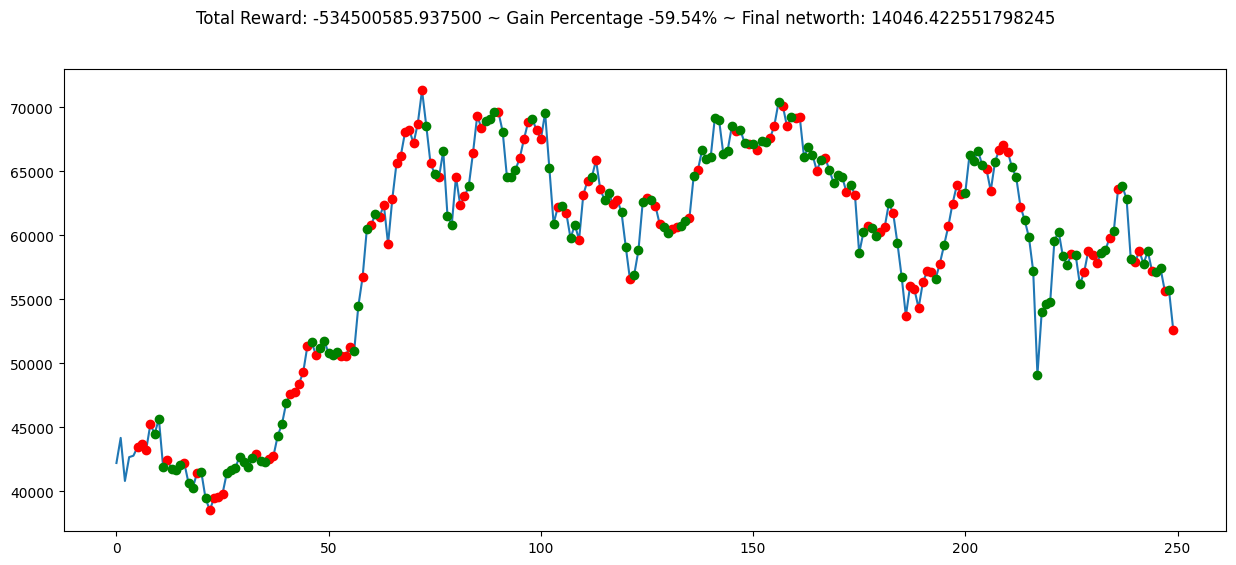

In [37]:
plt.figure(figsize=(15,6))
plt.cla()
test_env.render_all()
plt.show()

In [44]:
len(test_envs_profit[-100:])

100

Average Profit: 1.1431
Minimum Profit: 0.1945
Maximum Profit: 3.5469
Standard Deviation of Profits: 0.5561


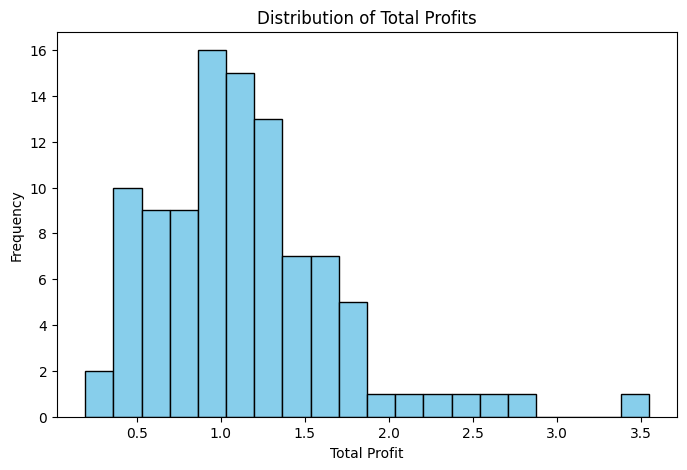

In [45]:
def analyze_profit_array(profits_array):
    """
    Analyzes an array of profits, converting it to a DataFrame and performing analysis.

    Args:
        profits_array (list or numpy.ndarray): Array of integer profits.
    """

    # Convert to numpy array if it's a list for easier handling
    profits_array = np.array(profits_array)

    # Create a DataFrame from the numpy array
    df = pd.DataFrame(profits_array, columns=['Total Profit'])


    # Calculate basic statistics
    average_profit = df['Total Profit'].mean()
    min_profit = df['Total Profit'].min()
    max_profit = df['Total Profit'].max()
    std_profit = df['Total Profit'].std()


    print(f"Average Profit: {average_profit:.4f}")
    print(f"Minimum Profit: {min_profit:.4f}")
    print(f"Maximum Profit: {max_profit:.4f}")
    print(f"Standard Deviation of Profits: {std_profit:.4f}")

    # Plot the distribution
    plt.figure(figsize=(8, 5))
    plt.hist(df['Total Profit'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Total Profits')
    plt.xlabel('Total Profit')
    plt.ylabel('Frequency')
    plt.show()
    

analyze_profit_array(test_envs_profit[-100:])